In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import mysql.connector

In [2]:
cnxdf = mysql.connector.connect(user='shivansh', password='9j9TRkpPml20',
                              host='prodslaveaurora-cluster.cluster-c8oe0gvszktr.ap-south-1.rds.amazonaws.com',
                              database= 'shoekonnect_live')

cursor=cnxdf.cursor()

In [3]:
cursor.execute('''SELECT
		 o.sellerid AS SellerId,
		 sm.companyname as Seller_Name,
		 cm2.name as Super_Category_Traditional,
		 concat(o.userid, '_', o.updatedon) as Transaction,
		 
			case
				 when sm.sellertype  = 'BRAND_AGGREGATORS' then 'Production Platform'
				 else 'Distribution Platform'
			 end as Platform,
		 od.variantId AS VariantId,
		 o.orderid as OrderID,
		 o.userid as UserID,
		 o.delpincode as PINCode,
		 ct.city as DelCity,
		 st.state as DelState,
		 pm.zone as Zone,
		 p.productid AS ProductId,
		 od.skprice as ProductPrice,
		 v.brandcode AS Article_Code,
		 cm.capacitygroup AS Group_Id,
		 cm.groupName as Group_Name,
		 cm1.name as Main_Category,
		 cm.categoryid as Sub_CategoryID,
		 cm.name as Sub_Category,
		 
			case
				 when str_to_date(from_unixtime(p.approvedon, '%Y/%m'), '%Y/%m')  = str_to_date(from_unixtime(o.updatedon, '%Y/%m'), '%Y/%m') then 'New-Sample'
				 else 'Old-Sample'
			 end as Sampling_Status,
		 str_to_date(from_unixtime(o.updatedon, '%Y/%m/%d'), '%Y/%m/%d') as OrderYM,
		 from_unixtime(o.updatedon, '%d') as OrderDay,
		 ((od.skPrice -od.couponDiscount + od.sellerdiscount + od.shipping + od.shippingTaxAmt -od.shippingDiscount -od.advDiscount) * od.setSize * od.SetCount) as GMV,
		 (od.setsize * od.setcount) as Total_Ordered_Pair
FROM  shoekonnect_live.orders AS  o
INNER JOIN shoekonnect_live.transaction_report AS  tr ON tr.orderid  = o.orderid 
LEFT JOIN shoekonnect_live.order_details AS  od ON o.orderid  = od.orderid 
LEFT JOIN shoekonnect_live.variants AS  v ON od.variantid  = v.variantid 
LEFT JOIN shoekonnect_live.products AS  p ON p.productid  = v.productid 
LEFT JOIN shoekonnect_live.seller_master AS  sm ON sm.userid  = o.sellerid 
LEFT JOIN shoekonnect_live.category_master AS  cm ON cm.categoryid  = p.subcategoryid 
LEFT JOIN shoekonnect_live.category_master AS  cm1 ON cm1.categoryid  = cm.parentid 
LEFT JOIN shoekonnect_live.category_master AS  cm2 ON cm2.categoryid  = cm1.parentid
LEFT JOIN shoekonnect_live.pincodes_new pm ON pm.pincode  = o.delpincode 
LEFT JOIN shoekonnect_live.city_master ct ON ct.cityid  = pm.cityid 
LEFT JOIN shoekonnect_live.state_master st ON st.stateid  = ct.stateid 
LEFT JOIN shoekonnect_live.user_master AS  um ON um.userid  = o.userid 
LEFT JOIN shoekonnect_live.order_rating AS  ort ON ort.orderid  = o.orderid 
WHERE (um.origverifydate>0 or um.isgstverified>0 or um.orderverifydone>0)
 AND sm.userid  != 1490486208
''')

In [4]:
rows=cursor.fetchall()
columns=cursor.description
columns=[i[0] for i in cursor.description]
df=pd.DataFrame(rows,columns=columns)

cursor.close()
cnxdf.close()

In [5]:
df

,SellerId,Seller_Name,Super_Category_Traditional,Transaction,Platform,VariantId,OrderID,UserID,PINCode,DelCity,...,Group_Id,Group_Name,Main_Category,Sub_CategoryID,Sub_Category,Sampling_Status,OrderYM,OrderDay,GMV,Total_Ordered_Pair
0,1476624890,Shanti Shoes,Footwear,1490564473_1618937992,Distribution Platform,1370566.0,3276016,1490564473,583101,BELLARY,...,3.0,Slippers,Men,1002762.0,Slippers,Old-Sample,2021-04-20,20,1611.04,4.0
1,1476624890,Shanti Shoes,None,1490479084_1601032049,Distribution Platform,1329176.0,2787386,1490479084,444601,AMRAVATI,...,NaN,None,None,NaN,None,Old-Sample,2020-09-25,25,2829.04,8.0
2,1476624890,Shanti Shoes,Footwear,1490374437_1618076767,Distribution Platform,1297015.0,3257745,1490374437,515775,ANANTHAPUR,...,3.0,Slippers,Men,1002762.0,Slippers,Old-Sample,2021-04-10,10,4039.20,8.0
3,1476624890,Shanti Shoes,None,1490330771_1598560746,Distribution Platform,1330349.0,2731218,1490330771,585102,GULBARGA,...,NaN,None,None,NaN,None,New-Sample,2020-08-28,28,2517.84,8.0
4,1476624890,Shanti Shoes,None,1490330771_1598560746,Distribution Platform,1336300.0,2731218,1490330771,585102,GULBARGA,...,NaN,None,None,NaN,None,New-Sample,2020-08-28,28,2517.84,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108235,1490487321,Comfort International,Footwear,1491015382_1681800740,Distribution Platform,2222026.0,5899966,1491015382,524201,NELLORE,...,3.0,Slippers,Men,1002765.0,Leather Slippers,Old-Sample,2023-04-18,18,1515.72,4.0
9108236,1490487321,Comfort International,Footwear,1491015382_1681800740,Distribution Platform,2224251.0,5899966,1491015382,524201,NELLORE,...,3.0,Sandals,Men,1002761.0,Sandals,Old-Sample,2023-04-18,18,1468.12,4.0
9108237,1490487321,Comfort International,Footwear,1490799368_1680586020,Distribution Platform,2224222.0,5852463,1490799368,781308,BARPETA,...,3.0,Sandals,Men,1002763.0,Roman Sandals,Old-Sample,2023-04-04,04,1276.80,4.0
9108238,1490487321,Comfort International,Footwear,1490799368_1680586020,Distribution Platform,2224221.0,5852463,1490799368,781308,BARPETA,...,3.0,Sandals,Men,1002763.0,Roman Sandals,Old-Sample,2023-04-04,04,1232.00,4.0


In [6]:
df['Platform'].value_counts() *100/df.shape[0]

Distribution Platform    98.513225
Production Platform       1.486775
Name: Platform, dtype: float64

In [7]:
df.VariantId.nunique()

638788

In [8]:
df.VariantId.value_counts()

1348429.0    7029
1640108.0    6879
1348428.0    6407
1348430.0    5996
1403561.0    5879
             ... 
1997812.0       1
2023398.0       1
2057724.0       1
1722128.0       1
2253102.0       1
Name: VariantId, Length: 638788, dtype: int64

In [9]:
df.VariantId.value_counts() *100/df.shape[0]

1348429.0    0.077172
1640108.0    0.075525
1348428.0    0.070343
1348430.0    0.065831
1403561.0    0.064546
               ...   
1997812.0    0.000011
2023398.0    0.000011
2057724.0    0.000011
1722128.0    0.000011
2253102.0    0.000011
Name: VariantId, Length: 638788, dtype: float64

In [10]:
df.columns

Index(['SellerId', 'Seller_Name', 'Super_Category_Traditional', 'Transaction',
       'Platform', 'VariantId', 'OrderID', 'UserID', 'PINCode', 'DelCity',
       'DelState', 'Zone', 'ProductId', 'ProductPrice', 'Article_Code',
       'Group_Id', 'Group_Name', 'Main_Category', 'Sub_CategoryID',
       'Sub_Category', 'Sampling_Status', 'OrderYM', 'OrderDay', 'GMV',
       'Total_Ordered_Pair'],
      dtype='object')

In [11]:
df.shape

(9108240, 25)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9108240 entries, 0 to 9108239
Data columns (total 25 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SellerId                    int64  
 1   Seller_Name                 object 
 2   Super_Category_Traditional  object 
 3   Transaction                 object 
 4   Platform                    object 
 5   VariantId                   float64
 6   OrderID                     int64  
 7   UserID                      int64  
 8   PINCode                     int64  
 9   DelCity                     object 
 10  DelState                    object 
 11  Zone                        object 
 12  ProductId                   float64
 13  ProductPrice                float64
 14  Article_Code                object 
 15  Group_Id                    float64
 16  Group_Name                  object 
 17  Main_Category               object 
 18  Sub_CategoryID              float64
 19  Sub_Category         

In [13]:
dfn = df[['UserID','DelCity','OrderID','PINCode',
       'DelState','ProductId','ProductPrice', 'Group_Id',
       'Group_Name', 'Main_Category', 'Sub_CategoryID','Sub_Category','Sampling_Status',
        'OrderYM', 'GMV', 'Total_Ordered_Pair']]

In [14]:
dfn.head()

,UserID,DelCity,OrderID,PINCode,DelState,ProductId,ProductPrice,Group_Id,Group_Name,Main_Category,Sub_CategoryID,Sub_Category,Sampling_Status,OrderYM,GMV,Total_Ordered_Pair
0,1490564473,BELLARY,3276016,583101,KARNATAKA,1246760.0,378.00,3.0,Slippers,Men,1002762.0,Slippers,Old-Sample,2021-04-20,1611.04,4.0
1,1490479084,AMRAVATI,2787386,444601,MAHARASHTRA,1220067.0,341.25,NaN,None,None,NaN,None,Old-Sample,2020-09-25,2829.04,8.0
2,1490374437,ANANTHAPUR,3257745,515775,ANDHRA PRADESH,1197638.0,519.75,3.0,Slippers,Men,1002762.0,Slippers,Old-Sample,2021-04-10,4039.20,8.0
3,1490330771,GULBARGA,2731218,585102,KARNATAKA,1220865.0,309.75,NaN,None,None,NaN,None,New-Sample,2020-08-28,2517.84,8.0
4,1490330771,GULBARGA,2731218,585102,KARNATAKA,1224800.0,309.75,NaN,None,None,NaN,None,New-Sample,2020-08-28,2517.84,8.0


In [15]:
dfn['OrderYM'] = pd.to_datetime(dfn['OrderYM'])

/var/folders/2d/cfk1zt4s35v5dzb8gbkgl3b00000gn/T/ipykernel_15419/2026840717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['OrderYM'] = pd.to_datetime(dfn['OrderYM'])


In [16]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9108240 entries, 0 to 9108239
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   UserID              int64         
 1   DelCity             object        
 2   OrderID             int64         
 3   PINCode             int64         
 4   DelState            object        
 5   ProductId           float64       
 6   ProductPrice        float64       
 7   Group_Id            float64       
 8   Group_Name          object        
 9   Main_Category       object        
 10  Sub_CategoryID      float64       
 11  Sub_Category        object        
 12  Sampling_Status     object        
 13  OrderYM             datetime64[ns]
 14  GMV                 float64       
 15  Total_Ordered_Pair  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(6)
memory usage: 1.1+ GB


In [17]:
dfn.isnull().sum()

UserID                     0
DelCity                   78
OrderID                    0
PINCode                    0
DelState                  78
ProductId              29295
ProductPrice             100
Group_Id              978034
Group_Name            978034
Main_Category         978034
Sub_CategoryID        978034
Sub_Category          978034
Sampling_Status            0
OrderYM                    0
GMV                      100
Total_Ordered_Pair       100
dtype: int64

In [18]:
dfnn = dfn[~df['Group_Id'].isnull()]

In [19]:
dfnn.isnull().sum()

UserID                 0
DelCity               21
OrderID                0
PINCode                0
DelState              21
ProductId              0
ProductPrice           0
Group_Id               0
Group_Name             0
Main_Category          0
Sub_CategoryID         0
Sub_Category           0
Sampling_Status        0
OrderYM                0
GMV                    0
Total_Ordered_Pair     0
dtype: int64

In [20]:
dfnnn = dfnn[~dfnn.DelState.isnull()]

In [21]:
dfnnn.isnull().sum()

UserID                0
DelCity               0
OrderID               0
PINCode               0
DelState              0
ProductId             0
ProductPrice          0
Group_Id              0
Group_Name            0
Main_Category         0
Sub_CategoryID        0
Sub_Category          0
Sampling_Status       0
OrderYM               0
GMV                   0
Total_Ordered_Pair    0
dtype: int64

In [22]:
dfns = dfnnn[~dfnnn.Total_Ordered_Pair.isnull()]

In [23]:
dfns.isnull().sum()

UserID                0
DelCity               0
OrderID               0
PINCode               0
DelState              0
ProductId             0
ProductPrice          0
Group_Id              0
Group_Name            0
Main_Category         0
Sub_CategoryID        0
Sub_Category          0
Sampling_Status       0
OrderYM               0
GMV                   0
Total_Ordered_Pair    0
dtype: int64

In [24]:
dfns.isnull().sum()

UserID                0
DelCity               0
OrderID               0
PINCode               0
DelState              0
ProductId             0
ProductPrice          0
Group_Id              0
Group_Name            0
Main_Category         0
Sub_CategoryID        0
Sub_Category          0
Sampling_Status       0
OrderYM               0
GMV                   0
Total_Ordered_Pair    0
dtype: int64

In [25]:
import time 

# print (time.strftime("%d/%m/%Y"))

In [26]:
dfns['Month'] = dfns.OrderYM.dt.month
dfns['Year'] = dfns.OrderYM.dt.year

In [27]:
# table = pd.pivot_table(dfns, index=['DelState','DelCity','UserID','Buyer_Status','Month','Year'],
#                     columns=['Group_Name'],aggfunc={'GMV': np.sum,
                                                    
#                                                     'ProductPrice': np.mean
#                                                    })

In [28]:
# table

In [29]:
# table.reset_index(inplace = True)

In [30]:
# list(table.columns)

In [31]:
# table.columns = ['DelState','DelCity','UserID','Buyer_Status','Month','Year','Boots GMV', 'Caps & Hats GMV',
#  'Casuals GMV','Dress & Blouse Material GMV','Dress & Gowns GMV','Female Innerwear GMV','Formals & Loafers GMV',
#  'Gloves GMV','Jackets GMV','Jeans & Trousers GMV','Jeggings GMV','Jumpsuits & Dungrarees GMV','Juttis & Bellies GMV',
#  'Kurtas,Pyajama & Kurta Set GMV','Kurtis, Dupatta & Kurti Set GMV','Leggings, Plazzo & Salwars GMV','Lehengas GMV',
#  'Male Innerwear GMV','Masks GMV','Mufflers, Stoles & Scarfs GMV','Nightsuits & Night Gowns GMV','Sarees, Blouse & Petticoat GMV',
#  'School Shoes GMV','Shawls GMV','Sherwanis GMV','Shirts GMV','Skirts GMV','Slippers & Sandals GMV','Socks GMV','Sports & Sneakers GMV',
#  'Suit & Dress Material (Stitched) GMV','Suits & Blazers GMV','Sweaters GMV','Sweatshirts/Hoodies GMV','T-Shirts GMV','Thermals GMV',
#  'Top Bottom Set GMV','Tops & Shrugs GMV','Track Pants, Shorts & TrackSuits GMV','Boots Prod Price','Caps & Hats Prod Price','Casuals Prod Price',
#  'Dress & Blouse Material Prod Price','Dress & Gowns Prod Price','Female Innerwear Prod Price','Formals & Loafers Prod Price',
#  'Gloves Prod Price','Jackets Prod Price','Jeans & Trousers Prod Price','Jeggings Prod Price','Jumpsuits & Dungrarees Prod Price',
#  'Juttis & Bellies Prod Price','Kurtas,Pyajama & Kurta Set Prod Price','Kurtis, Dupatta & Kurti Set Prod Price','Leggings, Plazzo & Salwars Prod Price',
#  'Lehengas Prod Price','Male Innerwear Prod Price','Masks Prod Price','Mufflers, Stoles & Scarfs Prod Price','Nightsuits & Night Gowns Prod Price',
#  'Sarees, Blouse & Petticoat Prod Price','School Shoes Prod Price','Shawls Prod Price','Sherwanis Prod Price','Shirts Prod Price',
#  'Skirts Prod Price','Slippers & Sandals Prod Price','Socks Prod Price','Sports & Sneakers Prod Price','Suit & Dress Material (Stitched) Prod Price',
#  'Suits & Blazers Prod Price','Sweaters Prod Price','Sweatshirts/Hoodies Prod Price','T-Shirts Prod Price','Thermals Prod Price',
#  'Top Bottom Set Prod Price','Tops & Shrugs Prod Price','Track Pants, Shorts & TrackSuits Prod Price']

In [32]:
# table

In [33]:
# table[(table['UserID'] == 1490391360)]

In [34]:
# tabletwo = pd.pivot_table(dfns, index=['DelState','DelCity','UserID','Buyer_Status','Month','Year'],
#                     columns=['Group_Name'],aggfunc={'GMV': np.sum,
                                                    
#                                                     'ProductPrice': np.mean,
#                                                     'VFM' : np.mean
#                                                    })

In [35]:
# dfns.columns

##### 1. PINCode Matrix --> State X City X PINCOde X SubCat X Month
- GMV
- GMV(Min-Max Scaling)
- Order
- Scaled Order
- Users ScaledUSers


##### 2. User Matrix   -->  User X SubCat X Month
- MinPP
- MaxPP
- GMV/Order


##### 3. Product Catalogue Product Matrix 
- Price
- GMV/Order 
- VFM

### SubCat Level Seasonality

In [36]:
dfns=dfns[(dfns.Year >= 2020)]

dfns_ = pd.pivot_table(dfns, index=['DelState','DelCity','PINCode','Sub_Category','Month','Year','OrderID','UserID'],
                        aggfunc={'GMV': np.sum})

dfns_.reset_index(inplace = True)

dfns_.columns

dfns_UOG = pd.pivot_table(dfns_, index=['DelState','DelCity','PINCode','Sub_Category','Month'],
                        aggfunc={'UserID': pd.Series.nunique,
                                 'OrderID': pd.Series.nunique,
                                'GMV':np.sum})

dfns_UOG.reset_index(inplace = True)

dfns_UOG.columns

dfns_UOG_final = pd.pivot_table(dfns_UOG, index=['DelState','DelCity','PINCode','Sub_Category'],
                        aggfunc={'GMV':[np.max,np.min],
                                'OrderID': [np.max,np.min],
                                'UserID':[np.max,np.min]})


s_col = []
for i in dfns_UOG_final.columns:
    s_col.append(i[0]+'_'+i[1])

dfns_UOG_final.columns = s_col
dfns_UOG_final.head(2)

dfns_UOG_final.reset_index(inplace=True)
dfns_UOG_final.head(5)

dfns_UOG.head(8)

subcat_seasonality_df = dfns_UOG.merge(dfns_UOG_final,on=['DelState','DelCity','PINCode','Sub_Category'])

subcat_seasonality_df.head(5)

subcat_seasonality_df.columns

subcat_seasonality_df['GMV_Scaled'] = subcat_seasonality_df['GMV'] / (subcat_seasonality_df['GMV_amax'])

subcat_seasonality_df['Order_Scaled'] = subcat_seasonality_df['OrderID'] / (subcat_seasonality_df['OrderID_amax'])

subcat_seasonality_df['User_Scaled'] = subcat_seasonality_df['UserID'] / (subcat_seasonality_df['UserID_amax'])


print(subcat_seasonality_df.head(5))



                      DelState  DelCity  PINCode Sub_Category  Month  \
0  ANDAMAN AND NICOBAR ISLANDS  ANDAMAN   744101        Boots      1   
1  ANDAMAN AND NICOBAR ISLANDS  ANDAMAN   744101        Boots      2   
2  ANDAMAN AND NICOBAR ISLANDS  ANDAMAN   744101        Boots      3   
3  ANDAMAN AND NICOBAR ISLANDS  ANDAMAN   744101        Boots      4   
4  ANDAMAN AND NICOBAR ISLANDS  ANDAMAN   744101        Boots      9   

        GMV  OrderID  UserID  GMV_amax  GMV_amin  OrderID_amax  OrderID_amin  \
0   6483.76        2       2  13265.66   1666.56             5             1   
1   6880.80        3       2  13265.66   1666.56             5             1   
2  12081.84        3       2  13265.66   1666.56             5             1   
3   2436.24        2       2  13265.66   1666.56             5             1   
4   7408.80        2       2  13265.66   1666.56             5             1   

   UserID_amax  UserID_amin  GMV_Scaled  Order_Scaled  User_Scaled  
0            3   

### User Level Matrix

In [37]:
dfns.head(5)

,UserID,DelCity,OrderID,PINCode,DelState,ProductId,ProductPrice,Group_Id,Group_Name,Main_Category,Sub_CategoryID,Sub_Category,Sampling_Status,OrderYM,GMV,Total_Ordered_Pair,Month,Year
0,1490564473,BELLARY,3276016,583101,KARNATAKA,1246760.0,378.00,3.0,Slippers,Men,1002762.0,Slippers,Old-Sample,2021-04-20,1611.04,4.0,4,2021
2,1490374437,ANANTHAPUR,3257745,515775,ANDHRA PRADESH,1197638.0,519.75,3.0,Slippers,Men,1002762.0,Slippers,Old-Sample,2021-04-10,4039.20,8.0,4,2021
10,1490322013,SALEM,3596111,636004,TAMIL NADU,1197638.0,525.00,3.0,Slippers,Men,1002762.0,Slippers,Old-Sample,2021-10-11,4200.00,8.0,10,2021
11,1490322013,SALEM,3596111,636004,TAMIL NADU,1197638.0,525.00,3.0,Slippers,Men,1002762.0,Slippers,Old-Sample,2021-10-11,4200.00,8.0,10,2021
12,1490322013,SALEM,3596111,636004,TAMIL NADU,1220013.0,509.25,3.0,Slippers,Men,1002762.0,Slippers,Old-Sample,2021-10-11,4074.00,8.0,10,2021


In [38]:
dfns.columns

Index(['UserID', 'DelCity', 'OrderID', 'PINCode', 'DelState', 'ProductId',
       'ProductPrice', 'Group_Id', 'Group_Name', 'Main_Category',
       'Sub_CategoryID', 'Sub_Category', 'Sampling_Status', 'OrderYM', 'GMV',
       'Total_Ordered_Pair', 'Month', 'Year'],
      dtype='object')

In [39]:
dfns=dfns[(dfns.Year >= 2020)]

dfns__ = pd.pivot_table(dfns, index=['UserID','DelState','DelCity','PINCode','Sub_Category','Month','Year','OrderID'],
                        aggfunc={'GMV': np.sum})

dfns__.reset_index(inplace = True)

dfns__.columns

dfns_OG = pd.pivot_table(dfns__, index=['UserID','DelState','DelCity','PINCode','Sub_Category','Month'],
                        aggfunc={'OrderID': pd.Series.nunique,
                                'GMV':np.sum})

dfns_OG.reset_index(inplace = True)

dfns_OG.columns

Index(['UserID', 'DelState', 'DelCity', 'PINCode', 'Sub_Category', 'Month',
       'GMV', 'OrderID'],
      dtype='object')

In [40]:
dfns_P = pd.pivot_table(dfns, index=['UserID','DelState','DelCity','PINCode','Sub_Category','Month'],
                        aggfunc={'ProductPrice': [np.max, np.min]})

p_col1 = []
for i in dfns_P.columns:
    p_col1.append(i[0]+'_'+i[1])
    
dfns_P.columns = p_col1

dfns_P.reset_index(inplace = True)

dfns_P.columns

Index(['UserID', 'DelState', 'DelCity', 'PINCode', 'Sub_Category', 'Month',
       'ProductPrice_amax', 'ProductPrice_amin'],
      dtype='object')

In [41]:
dfns_P

,UserID,DelState,DelCity,PINCode,Sub_Category,Month,ProductPrice_amax,ProductPrice_amin
0,1479641756,TELANGANA,HYDERABAD,500024,PVC Canvas/Sneakers,7,126.00,126.00
1,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,4,186.28,186.28
2,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,7,252.00,252.00
3,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Slippers,1,150.08,66.08
4,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Slippers,12,71.68,71.68
...,...,...,...,...,...,...,...,...
2583045,1491147164,UTTAR PRADESH,LUCKNOW,226022,Shirts,5,284.52,239.15
2583046,1491147164,UTTAR PRADESH,LUCKNOW,226022,Woven Kurtas,5,122.85,122.85
2583047,1491147164,UTTAR PRADESH,LUCKNOW,226022,Woven Trousers,5,383.25,367.50
2583048,1491147180,MAHARASHTRA,NANDURBAR,425413,Knit T-Shirts,5,229.95,188.53


In [42]:
dfns_OG_final = pd.pivot_table(dfns_OG, index=['UserID','DelState','DelCity','PINCode','Sub_Category'],
                        aggfunc={'GMV':[np.max,np.min],
                                'OrderID': [np.max,np.min]})


s_col1 = []
for i in dfns_OG_final.columns:
    s_col1.append(i[0]+'_'+i[1])

dfns_OG_final.columns = s_col1
dfns_OG_final.head(2)

GMV_amax  \
UserID     DelState  DelCity       PINCode Sub_Category                    
1479641756 TELANGANA HYDERABAD     500024  PVC Canvas/Sneakers     553.0   
                     MAHABUB NAGAR 509125  EVA Sandals            2016.0   

                                                                GMV_amin  \
UserID     DelState  DelCity       PINCode Sub_Category                    
1479641756 TELANGANA HYDERABAD     500024  PVC Canvas/Sneakers    553.00   
                     MAHABUB NAGAR 509125  EVA Sandals           1490.24   

                                                                OrderID_amax  \
UserID     DelState  DelCity       PINCode Sub_Category                        
1479641756 TELANGANA HYDERABAD     500024  PVC Canvas/Sneakers             1   
                     MAHABUB NAGAR 509125  EVA Sandals                     1   

                                                                OrderID_amin  
UserID     DelState  DelCity       PINCode Sub_Category                       
1479641756 TELANGANA HYDERABAD     500024  PVC Canvas/Sneakers             1  
                     MAHABUB NAGAR 509125  EVA Sandals                     1

In [43]:
dfns_OG_final.reset_index(inplace=True)
dfns_OG_final.head(5)

,UserID,DelState,DelCity,PINCode,Sub_Category,GMV_amax,GMV_amin,OrderID_amax,OrderID_amin
0,1479641756,TELANGANA,HYDERABAD,500024,PVC Canvas/Sneakers,553.00,553.00,1,1
1,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,2016.00,1490.24,1,1
2,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Slippers,2337.92,573.44,3,1
3,1479641756,TELANGANA,MAHABUB NAGAR,509125,Fabrication Slippers,1838.36,1647.44,1,1
4,1479641756,TELANGANA,MAHABUB NAGAR,509125,Hawai Slippers,1093.12,528.64,1,1


In [44]:
dfns_OG.head(5)

,UserID,DelState,DelCity,PINCode,Sub_Category,Month,GMV,OrderID
0,1479641756,TELANGANA,HYDERABAD,500024,PVC Canvas/Sneakers,7,553.00,1
1,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,4,1490.24,1
2,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,7,2016.00,1
3,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Slippers,1,2337.92,3
4,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Slippers,12,573.44,1


In [45]:
user_pref_df = dfns_OG.merge(dfns_P,on=['UserID','DelState','DelCity','PINCode','Sub_Category','Month'])

user_pref_df.head(5)

,UserID,DelState,DelCity,PINCode,Sub_Category,Month,GMV,OrderID,ProductPrice_amax,ProductPrice_amin
0,1479641756,TELANGANA,HYDERABAD,500024,PVC Canvas/Sneakers,7,553.00,1,126.00,126.00
1,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,4,1490.24,1,186.28,186.28
2,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,7,2016.00,1,252.00,252.00
3,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Slippers,1,2337.92,3,150.08,66.08
4,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Slippers,12,573.44,1,71.68,71.68


In [46]:
user_pref_df = user_pref_df.merge(dfns_OG_final,on=['UserID','DelState','DelCity','PINCode','Sub_Category'])

In [47]:
user_pref_df.columns

user_pref_df['GMV_Scaled'] = user_pref_df['GMV'] / (user_pref_df['GMV_amax'])

user_pref_df['Order_Scaled'] = user_pref_df['OrderID'] / (user_pref_df['OrderID_amax'])


user_pref_df.head(5)

,UserID,DelState,DelCity,PINCode,Sub_Category,Month,GMV,OrderID,ProductPrice_amax,ProductPrice_amin,GMV_amax,GMV_amin,OrderID_amax,OrderID_amin,GMV_Scaled,Order_Scaled
0,1479641756,TELANGANA,HYDERABAD,500024,PVC Canvas/Sneakers,7,553.00,1,126.00,126.00,553.00,553.00,1,1,1.000000,1.000000
1,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,4,1490.24,1,186.28,186.28,2016.00,1490.24,1,1,0.739206,1.000000
2,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,7,2016.00,1,252.00,252.00,2016.00,1490.24,1,1,1.000000,1.000000
3,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Slippers,1,2337.92,3,150.08,66.08,2337.92,573.44,3,1,1.000000,1.000000
4,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Slippers,12,573.44,1,71.68,71.68,2337.92,573.44,3,1,0.245278,0.333333


In [48]:
print("User DF Shape :-",user_pref_df.shape, end = "   ")
print('Unique Buyers :-',user_pref_df.UserID.nunique())

User DF Shape :- (2583050, 16)   Unique Buyers :- 239136


In [49]:
print("User DF Shape :-",user_pref_df.shape, end = "   ")
print('Unique Buyers :-',user_pref_df.UserID.nunique())

User DF Shape :- (2583050, 16)   Unique Buyers :- 239136


In [50]:
user_pref_df[user_pref_df.OrderID >= 2].sort_values('OrderID').head()

,UserID,DelState,DelCity,PINCode,Sub_Category,Month,GMV,OrderID,ProductPrice_amax,ProductPrice_amin,GMV_amax,GMV_amin,OrderID_amax,OrderID_amin,GMV_Scaled,Order_Scaled
1036720,1490509027,TRIPURA,TELIAMURA,799205,Heel Sandals,11,7749.00,2,330.75,315.00,12459.96,4099.20,4,1,0.621912,0.500000
1285232,1490591851,UTTAR PRADESH,LUCKNOW,226101,Sport Shoes,6,3234.68,2,257.25,250.95,3234.68,3234.68,2,2,1.000000,1.000000
1285228,1490591851,UTTAR PRADESH,LUCKNOW,226101,PVC Sport Shoes,11,2597.00,2,257.25,179.20,3475.64,828.80,3,1,0.747201,0.666667
1285227,1490591851,UTTAR PRADESH,LUCKNOW,226101,PVC Sport Shoes,10,2814.36,2,208.47,95.55,3475.64,828.80,3,1,0.809739,0.666667
1285222,1490591851,UTTAR PRADESH,LUCKNOW,226101,PVC Sandals,2,2497.60,2,140.00,112.00,2497.60,407.40,2,1,1.000000,1.000000


In [51]:
user_pref_df.loc[(user_pref_df.UserID == 1490362295) & 
             (user_pref_df.Sub_Category == 'EVA Sport Shoes')].sort_values('Month',ascending=False)

,UserID,DelState,DelCity,PINCode,Sub_Category,Month,GMV,OrderID,ProductPrice_amax,ProductPrice_amin,GMV_amax,GMV_amin,OrderID_amax,OrderID_amin,GMV_Scaled,Order_Scaled
330677,1490362295,UTTARAKHAND,PAURI GARHWAL,246149,EVA Sport Shoes,12,266268.59,94,986.74,304.50,270756.24,88814.54,95,30,0.983425,0.989474
330676,1490362295,UTTARAKHAND,PAURI GARHWAL,246149,EVA Sport Shoes,11,236538.86,81,998.55,237.44,270756.24,88814.54,95,30,0.873623,0.852632
330675,1490362295,UTTARAKHAND,PAURI GARHWAL,246149,EVA Sport Shoes,10,191067.72,69,818.72,288.75,270756.24,88814.54,95,30,0.705682,0.726316
330674,1490362295,UTTARAKHAND,PAURI GARHWAL,246149,EVA Sport Shoes,9,128209.66,47,915.84,336.11,270756.24,88814.54,95,30,0.473524,0.494737
330673,1490362295,UTTARAKHAND,PAURI GARHWAL,246149,EVA Sport Shoes,8,134139.16,46,1029.00,288.75,270756.24,88814.54,95,30,0.495424,0.484211
330672,1490362295,UTTARAKHAND,PAURI GARHWAL,246149,EVA Sport Shoes,7,89491.82,37,692.16,283.50,270756.24,88814.54,95,30,0.330525,0.389474
330671,1490362295,UTTARAKHAND,PAURI GARHWAL,246149,EVA Sport Shoes,6,88814.54,30,811.82,347.20,270756.24,88814.54,95,30,0.328024,0.315789
330670,1490362295,UTTARAKHAND,PAURI GARHWAL,246149,EVA Sport Shoes,5,114683.74,42,754.88,278.25,270756.24,88814.54,95,30,0.423568,0.442105
330669,1490362295,UTTARAKHAND,PAURI GARHWAL,246149,EVA Sport Shoes,4,270756.24,95,901.60,289.80,270756.24,88814.54,95,30,1.000000,1.000000
330668,1490362295,UTTARAKHAND,PAURI GARHWAL,246149,EVA Sport Shoes,3,150513.91,56,974.40,288.75,270756.24,88814.54,95,30,0.555902,0.589474


In [52]:
subcat_seasonality_df.sort_values('OrderID',ascending=False)

,DelState,DelCity,PINCode,Sub_Category,Month,GMV,OrderID,UserID,GMV_amax,GMV_amin,OrderID_amax,OrderID_amin,UserID_amax,UserID_amin,GMV_Scaled,Order_Scaled,User_Scaled
1404862,WEST BENGAL,MALDA,732201,PVC Sport Shoes,11,839792.30,272,46,839792.30,48598.04,272,13,48,6,1.000000,1.000000,0.958333
794961,MANIPUR,IMPHAL,795001,Flat Slippers,3,1216641.41,249,77,1216641.41,193774.22,249,27,77,19,1.000000,1.000000,1.000000
795479,MANIPUR,IMPHAL,795001,PU Slippers,4,3308468.98,243,93,3308468.98,420484.19,243,51,93,34,1.000000,1.000000,1.000000
815064,NAGALAND,KOHIMA,797001,PVC Sport Shoes,11,1171131.63,232,45,1171131.63,29886.24,232,6,45,5,1.000000,1.000000,1.000000
1404863,WEST BENGAL,MALDA,732201,PVC Sport Shoes,12,735837.28,231,48,839792.30,48598.04,272,13,48,6,0.876213,0.849265,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639912,MADHYA PRADESH,CHHINDWARA,480106,Kurtis Set,12,2906.40,1,1,18528.36,1070.16,6,1,4,1,0.156862,0.166667,0.250000
639913,MADHYA PRADESH,CHHINDWARA,480106,Leather Flat Slippers,1,1341.54,1,1,1341.54,1341.54,1,1,1,1,1.000000,1.000000,1.000000
639914,MADHYA PRADESH,CHHINDWARA,480106,Leather Formal Shoes,2,1613.20,1,1,1613.20,1613.20,1,1,1,1,1.000000,1.000000,1.000000
639915,MADHYA PRADESH,CHHINDWARA,480106,Leather Loafer Shoes,1,1214.08,1,1,6837.28,1214.08,3,1,2,1,0.177568,0.333333,0.500000


In [53]:
print(subcat_seasonality_df.Order_Scaled.value_counts())

1.000000    622478
0.500000    197277
0.333333    117968
0.250000     69977
0.666667     50628
             ...  
0.223404         1
0.563830         1
0.953846         1
0.822785         1
0.366834         1
Name: Order_Scaled, Length: 2405, dtype: int64


In [54]:
subcat_seasonality_df[(subcat_seasonality_df.Sub_Category == 'Knit Jackets')]

,DelState,DelCity,PINCode,Sub_Category,Month,GMV,OrderID,UserID,GMV_amax,GMV_amin,OrderID_amax,OrderID_amin,UserID_amax,UserID_amin,GMV_Scaled,Order_Scaled,User_Scaled
266,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN,744101,Knit Jackets,1,26911.35,4,2,39090.00,1990.80,4,1,2,1,0.688446,1.00,1.0
267,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN,744101,Knit Jackets,2,2360.67,1,1,39090.00,1990.80,4,1,2,1,0.060391,0.25,0.5
268,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN,744101,Knit Jackets,3,3767.40,2,1,39090.00,1990.80,4,1,2,1,0.096378,0.50,0.5
269,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN,744101,Knit Jackets,4,1990.80,1,1,39090.00,1990.80,4,1,2,1,0.050929,0.25,0.5
270,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN,744101,Knit Jackets,6,2646.90,1,1,39090.00,1990.80,4,1,2,1,0.067713,0.25,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442283,WEST BENGAL,PURULIYA,723201,Knit Jackets,12,2828.70,1,1,9560.70,2828.70,2,1,1,1,0.295867,0.50,1.0
1442450,WEST BENGAL,PURULIYA,723202,Knit Jackets,11,22160.16,1,1,22160.16,22160.16,1,1,1,1,1.000000,1.00,1.0
1442655,WEST BENGAL,RANAGHAT,741127,Knit Jackets,12,2604.00,1,1,2604.00,2604.00,1,1,1,1,1.000000,1.00,1.0
1443440,WEST BENGAL,SILIGURI,734002,Knit Jackets,11,1675.80,1,1,1675.80,1496.25,1,1,1,1,1.000000,1.00,1.0


In [55]:
list(subcat_seasonality_df.DelState.unique())

['ANDAMAN AND NICOBAR ISLANDS',
 'ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHANDIGARH',
 'CHHATISGARH',
 'DADRA AND NAGAR HAVELI',
 'DAMAN AND DIU',
 'DELHI',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU AND KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUDUCHERRY',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TELANGANA',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL']

In [56]:
subcat_seasonality_df.shape

(1443655, 17)

In [57]:
user_pref_df.columns

Index(['UserID', 'DelState', 'DelCity', 'PINCode', 'Sub_Category', 'Month',
       'GMV', 'OrderID', 'ProductPrice_amax', 'ProductPrice_amin', 'GMV_amax',
       'GMV_amin', 'OrderID_amax', 'OrderID_amin', 'GMV_Scaled',
       'Order_Scaled'],
      dtype='object')

<AxesSubplot:xlabel='Month', ylabel='OrderID'>

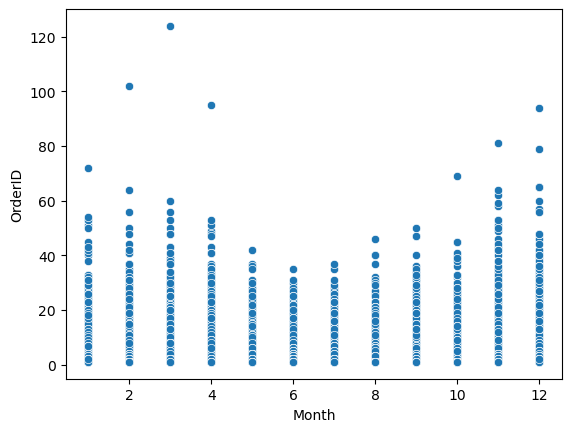

In [58]:
sb.scatterplot(x = user_pref_df.Month, y = user_pref_df.OrderID)

<AxesSubplot:xlabel='GMV', ylabel='OrderID'>

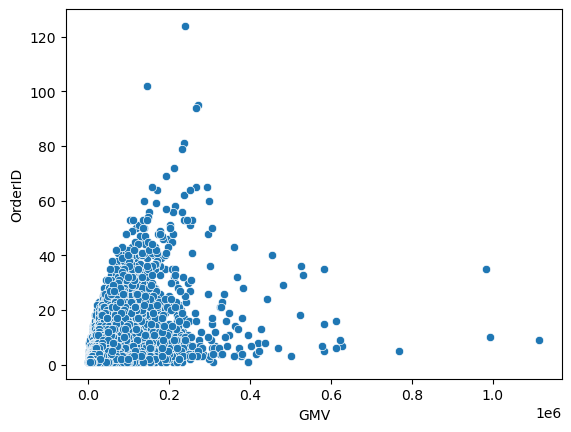

In [59]:
sb.scatterplot(x = user_pref_df.GMV, y = user_pref_df.OrderID)

<AxesSubplot:xlabel='Month', ylabel='OrderID'>

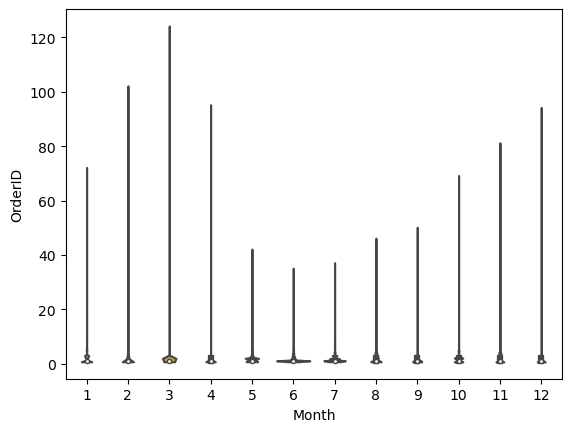

In [60]:
sb.violinplot(y=user_pref_df["OrderID"], x = user_pref_df.Month)

<AxesSubplot:xlabel='GMV'>

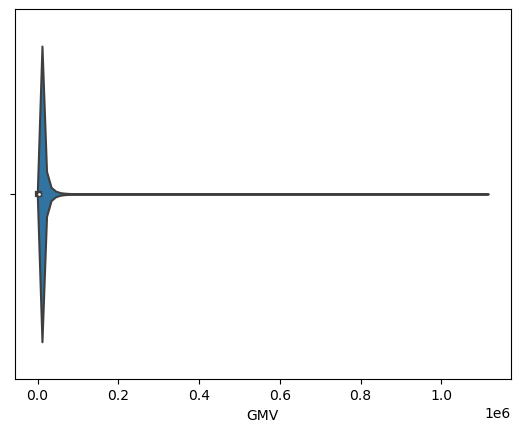

In [61]:
sb.violinplot(x=user_pref_df["GMV"])

<AxesSubplot:>

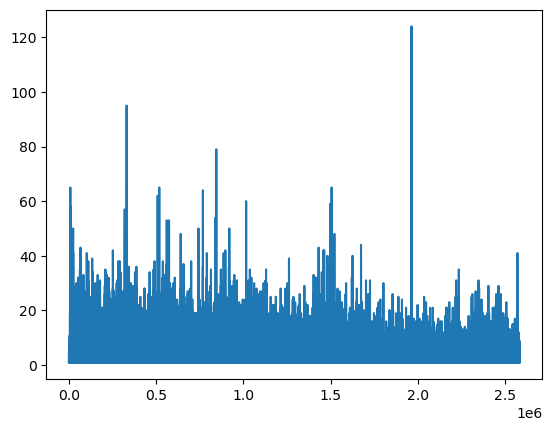

In [62]:
user_pref_df.OrderID.plot()

<AxesSubplot:>

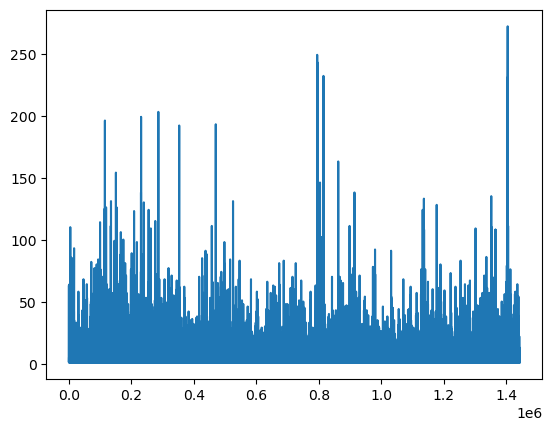

In [63]:
subcat_seasonality_df.OrderID.plot()

In [64]:
subcat_seasonality_df_test = subcat_seasonality_df[subcat_seasonality_df.DelCity == 'DELHI']

In [65]:
subcat_seasonality_df_test.Sub_Category.unique()

array(['Boots', 'Canvas/Sneakers', 'Flat Slippers', 'Flat/Wedge Ballies',
       'Knit Jumpsuits', 'Knit Night Suits', 'Knit Tops', 'Kurtis',
       'Leather Formal Shoes', 'PU Slippers', 'PVC Sport Shoes',
       'Sport Shoes', 'Woven Embroidered Kurtis',
       'Woven Embroidered Lehengas', 'Woven Gowns', 'Woven Shirts',
       'Woven Trousers', 'EVA Slippers', 'EVA Sport Shoes',
       'Flat Bellies', 'Flat Sandals', 'Heel Sandals', 'PVC Ballies',
       'PVC Canvas/Sneakers', 'PVC Slippers', 'Wedge Bellies',
       'Wedge Sandals', 'Driving Shoes', 'Fabrication Slippers',
       'Formal Shoes', 'Full Moulded EVA Shoes',
       'Full Moulded EVA Slippers', 'Hawai Slippers', 'Heel Bellies',
       'Knit SweatShirts/Hoodie', 'Knit Thermals', 'Knit Top Bottom Set',
       'Knit Track Suit', 'Leather Flat Slippers', 'Loafer Shoes',
       'PU Sandals', 'PVC Boots', 'PVC School Shoes',
       'Rubber/TPR Canvas and Sneakers', 'Safety Shoes', 'Slippers',
       'Wedge Slippers', 'Woven Ca

Boots 




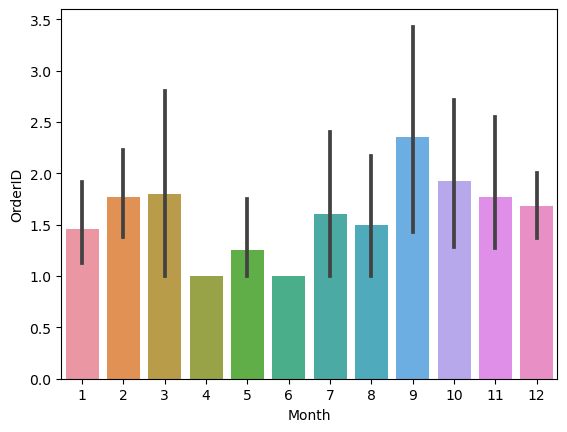

Canvas/Sneakers 




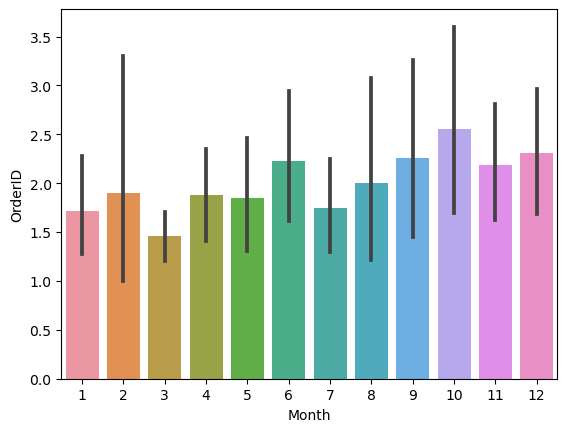

Flat Slippers 




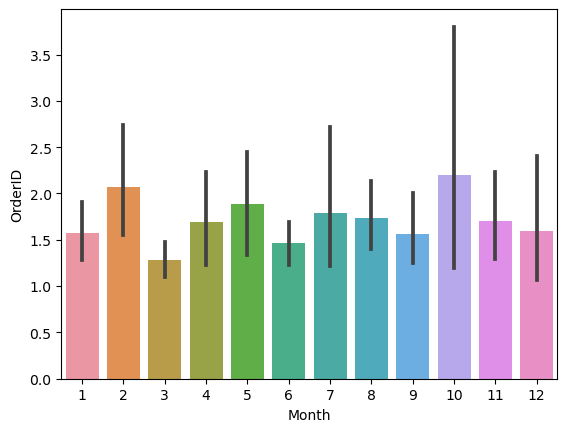

Flat/Wedge Ballies 




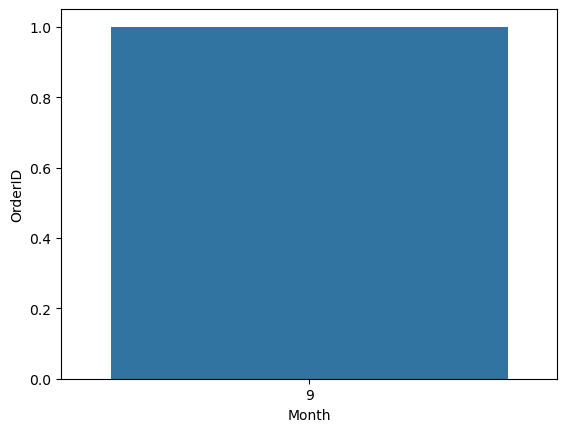

Knit Jumpsuits 




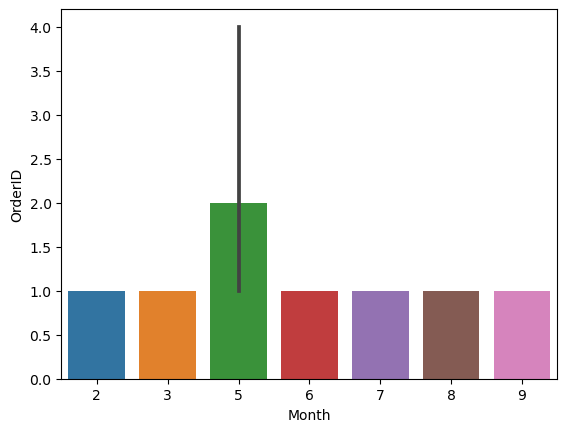

Knit Night Suits 




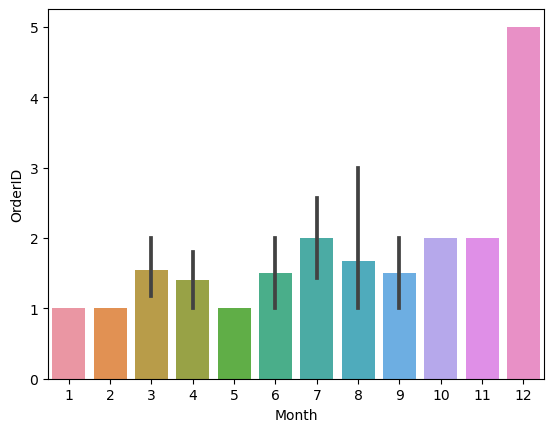

Knit Tops 




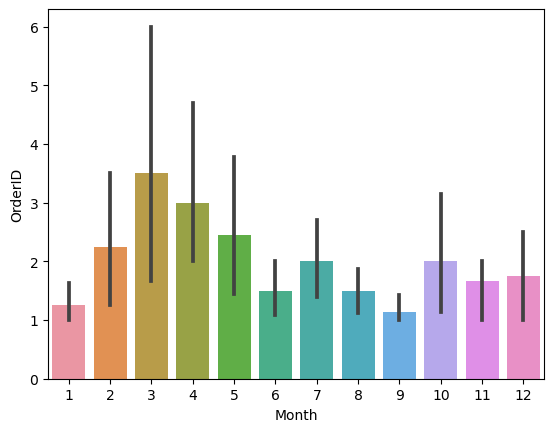

Kurtis 




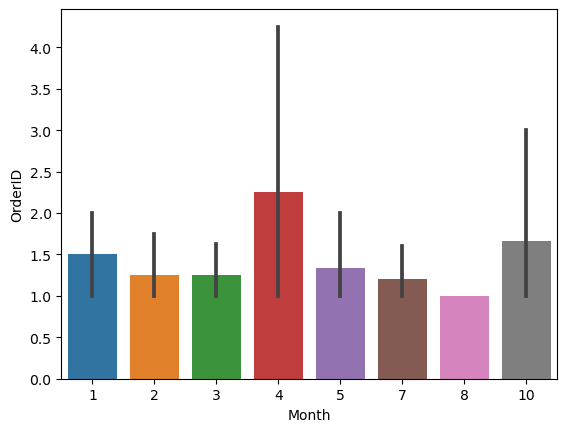

Leather Formal Shoes 




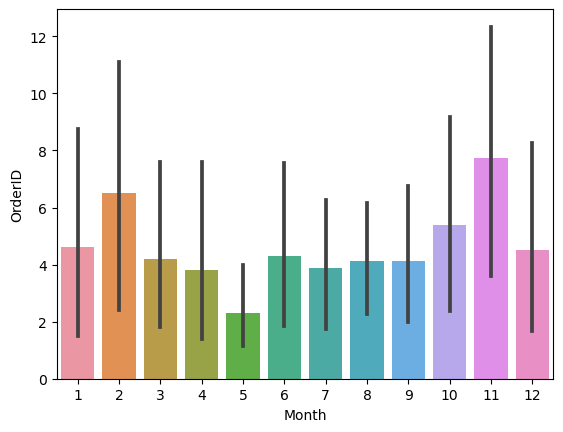

PU Slippers 




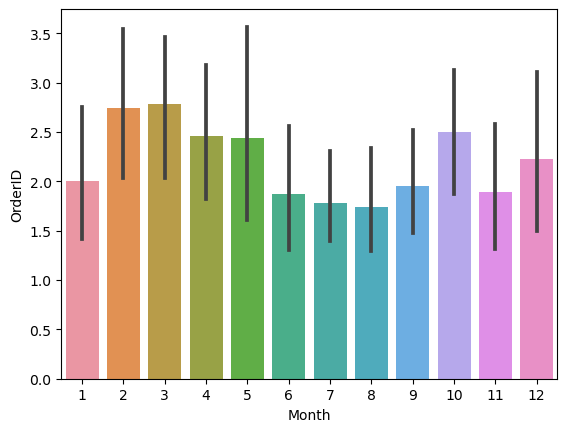

PVC Sport Shoes 




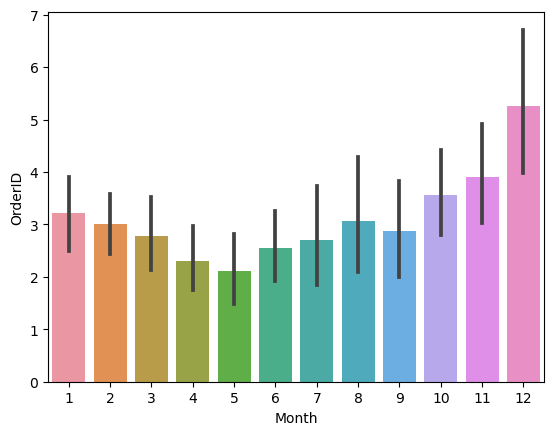

Sport Shoes 




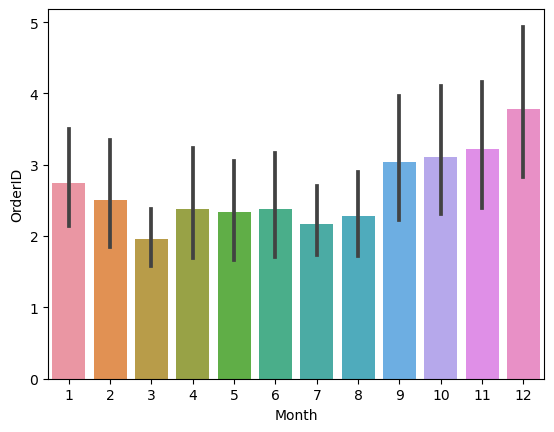

Woven Embroidered Kurtis 




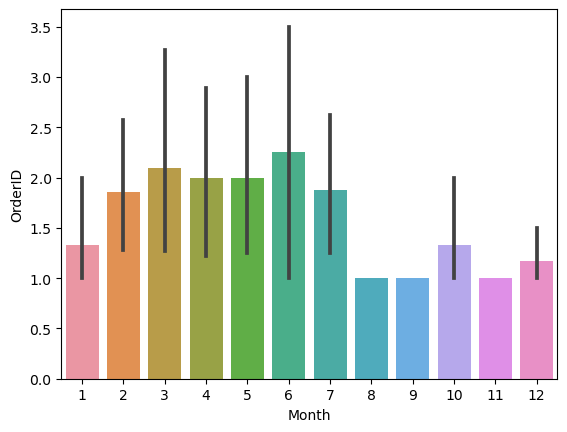

Woven Embroidered Lehengas 




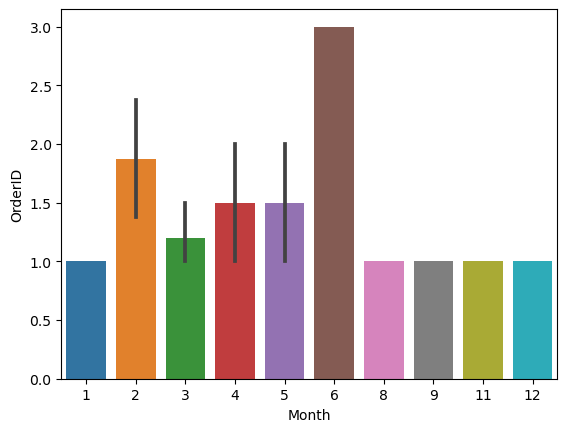

Woven Gowns 




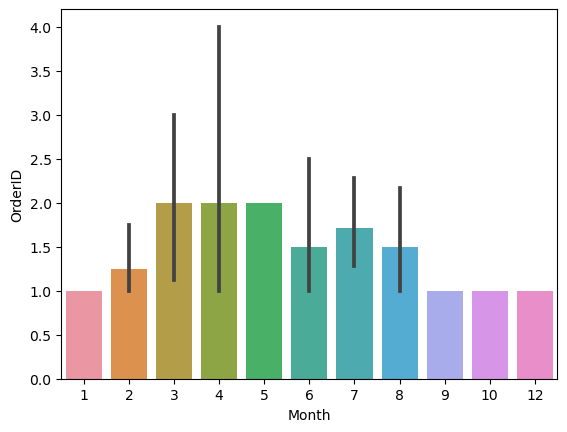

Woven Shirts 




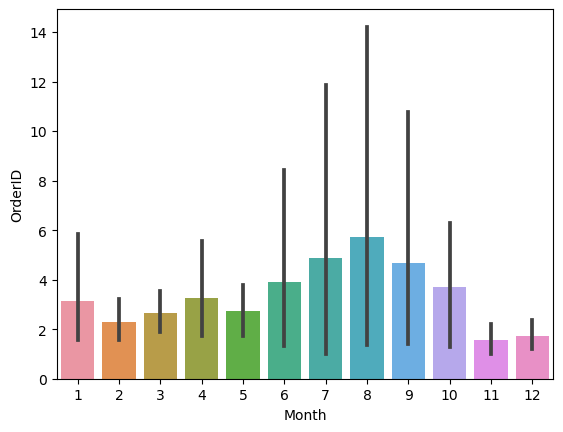

Woven Trousers 




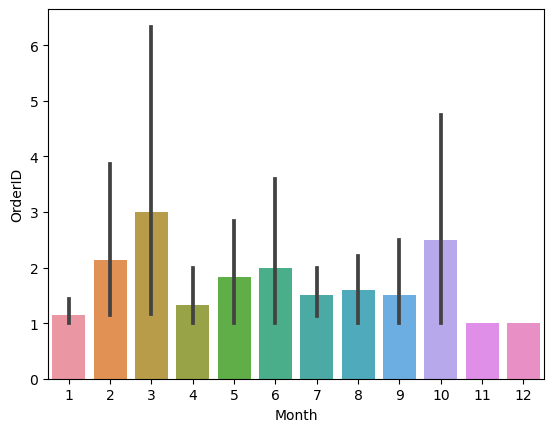

EVA Slippers 




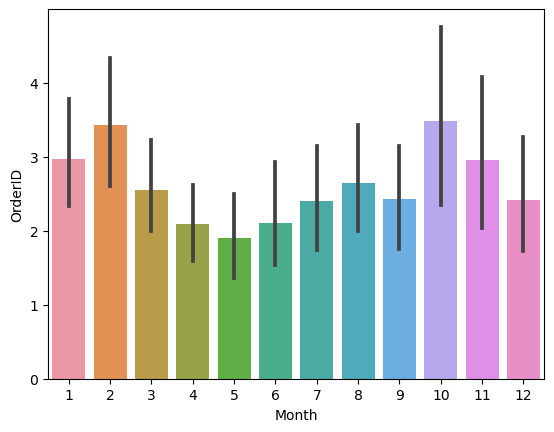

EVA Sport Shoes 




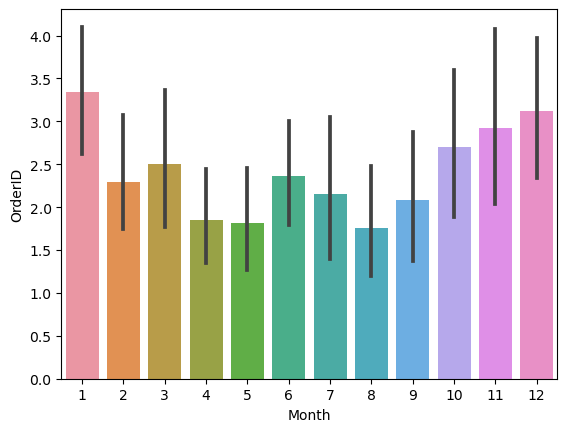

Flat Bellies 




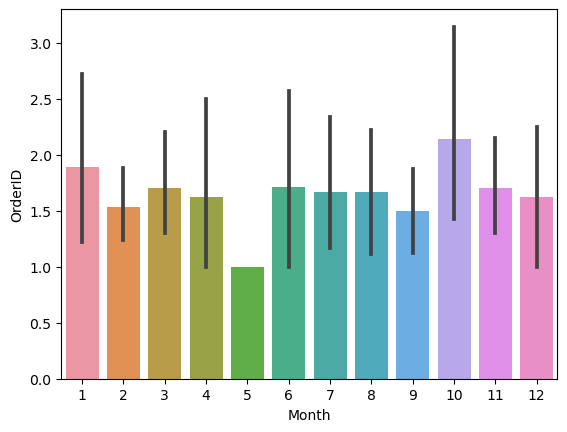

Flat Sandals 




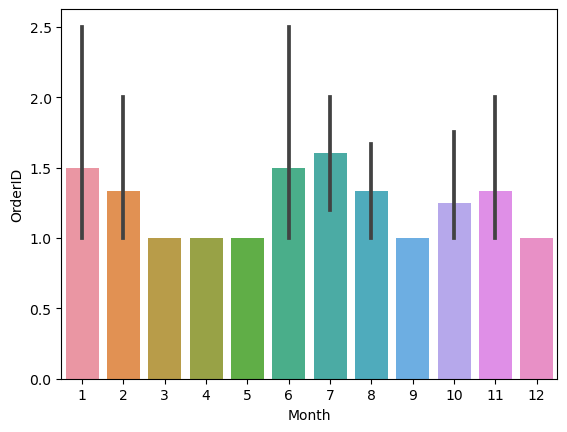

Heel Sandals 




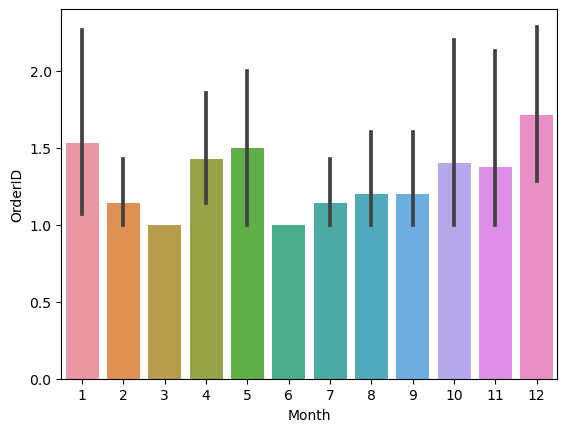

PVC Ballies 




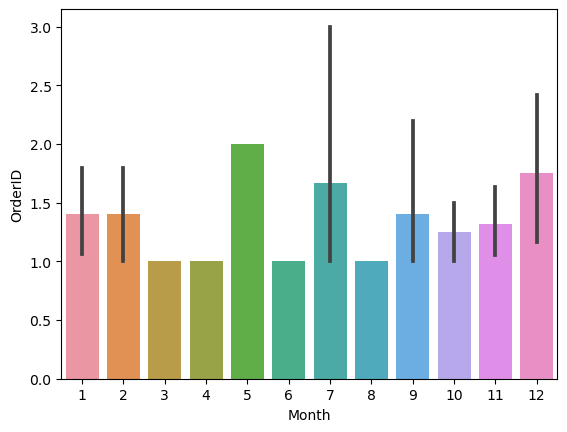

PVC Canvas/Sneakers 




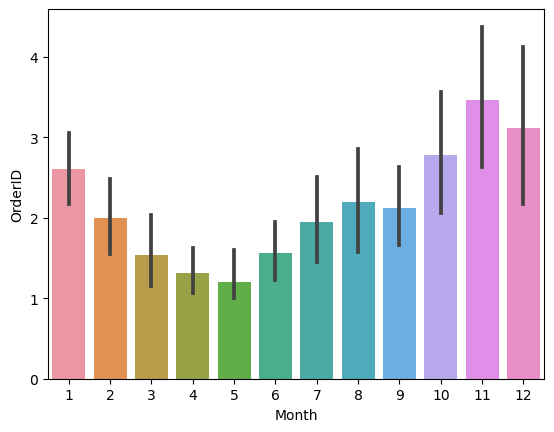

PVC Slippers 




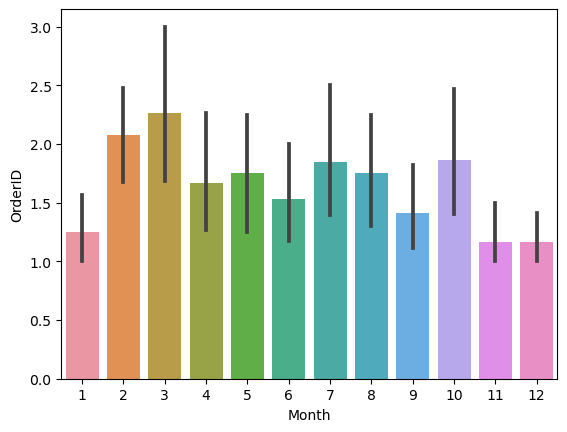

Wedge Bellies 




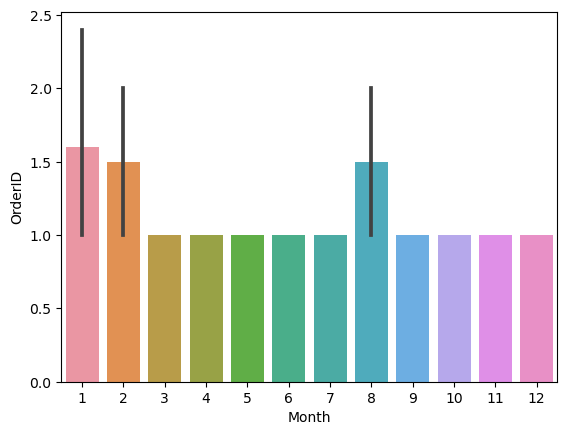

Wedge Sandals 




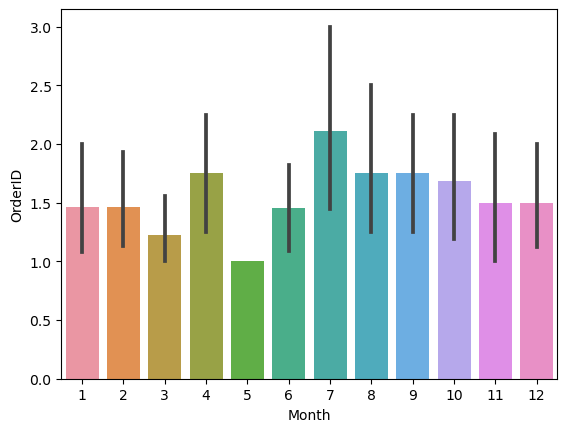

Driving Shoes 




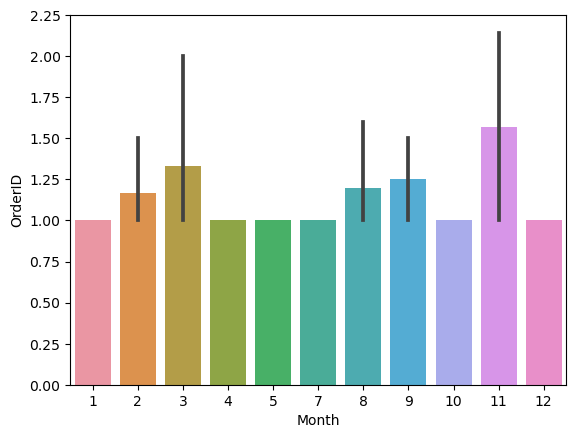

Fabrication Slippers 




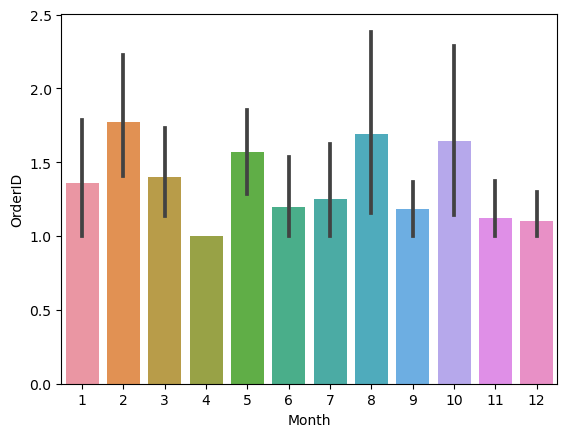

Formal Shoes 




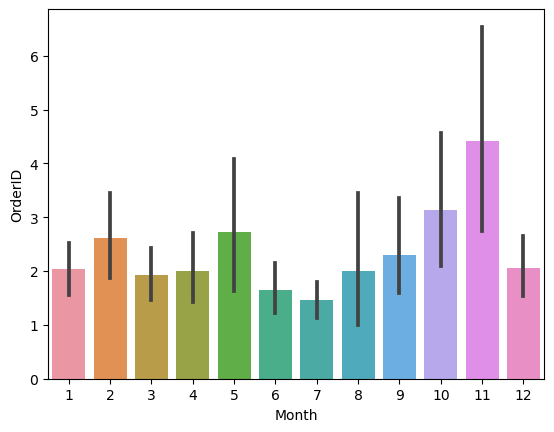

Full Moulded EVA Shoes 




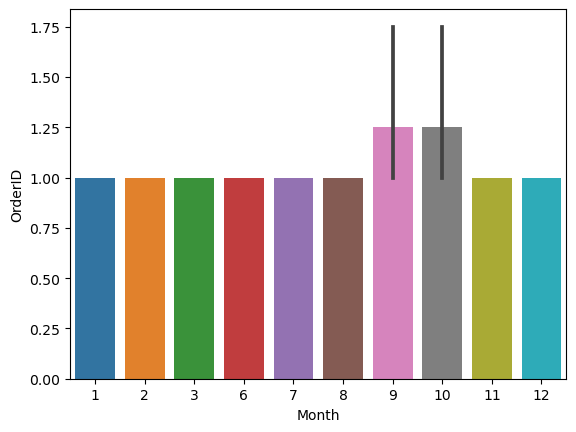

Full Moulded EVA Slippers 




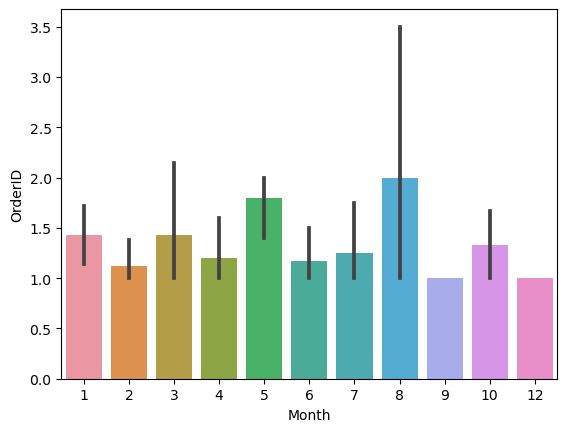

Hawai Slippers 




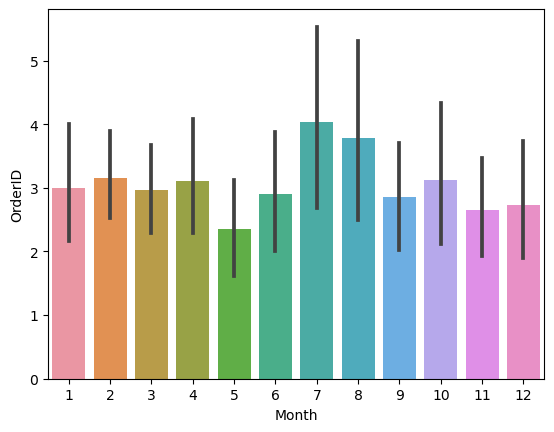

Heel Bellies 




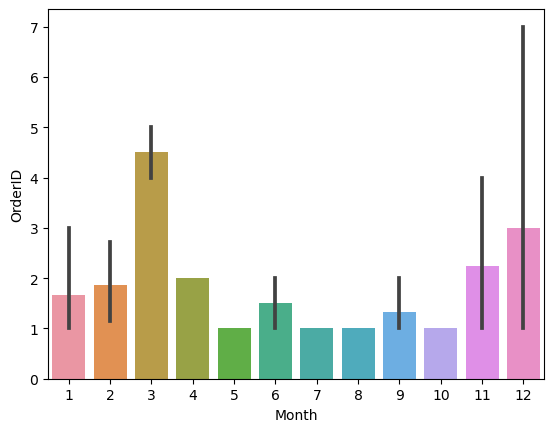

Knit SweatShirts/Hoodie 




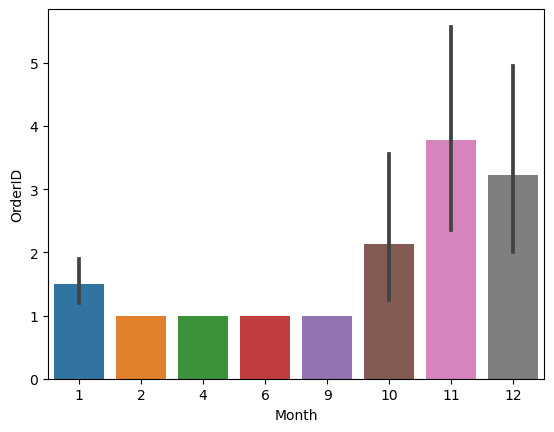

Knit Thermals 




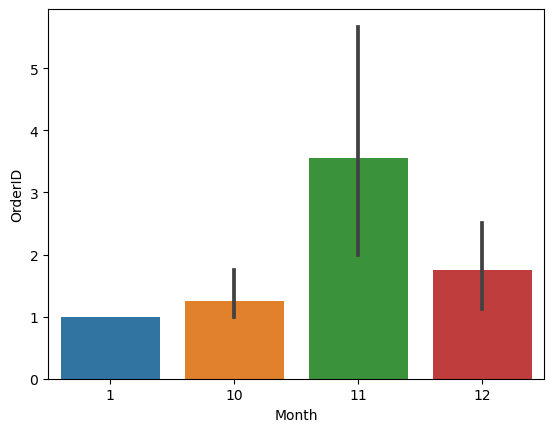

Knit Top Bottom Set 




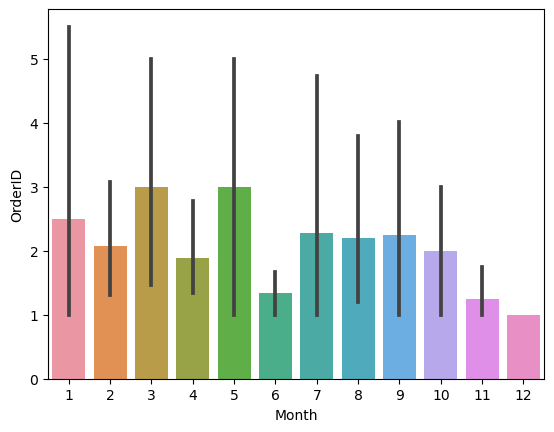

Knit Track Suit 




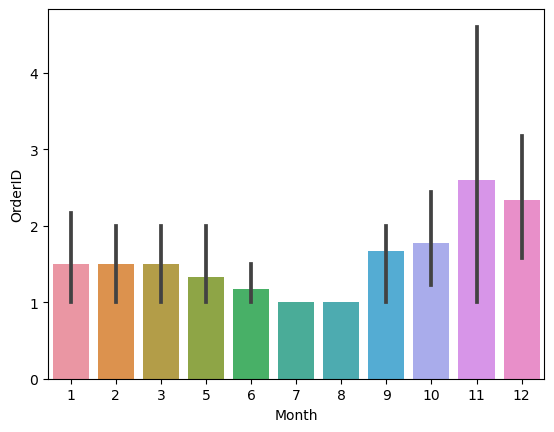

Leather Flat Slippers 




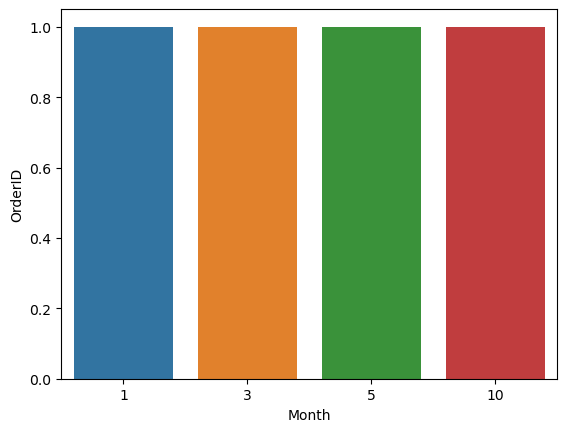

Loafer Shoes 




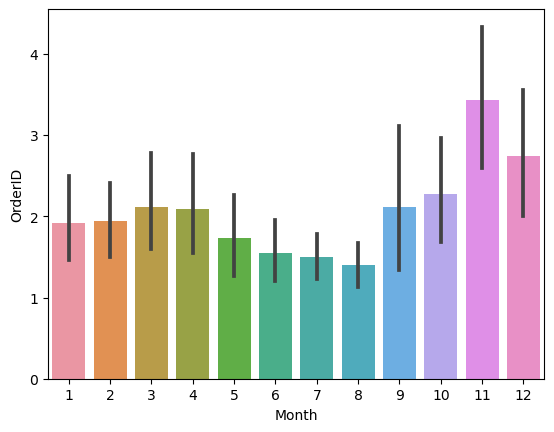

PU Sandals 




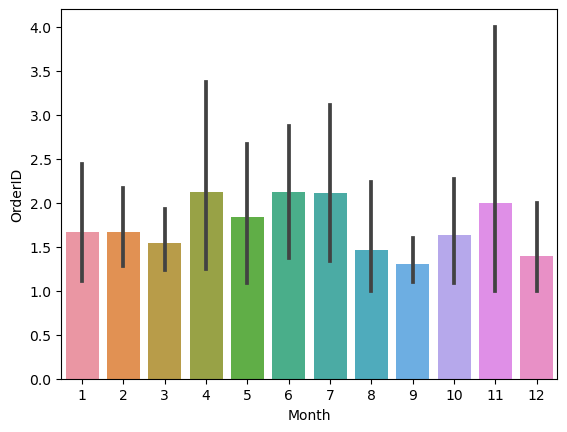

PVC Boots 




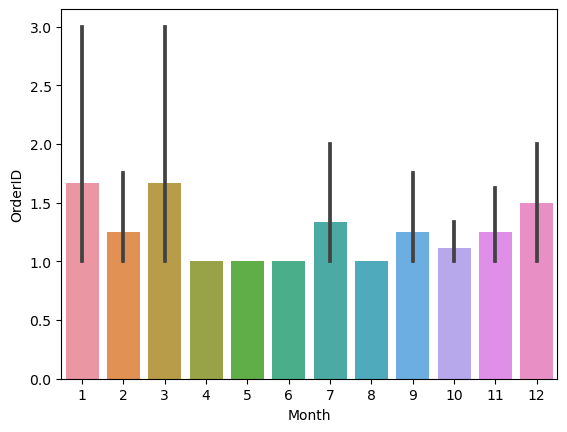

PVC School Shoes 




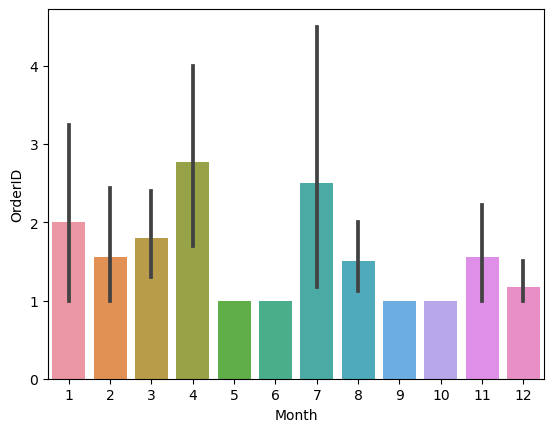

Rubber/TPR Canvas and Sneakers 




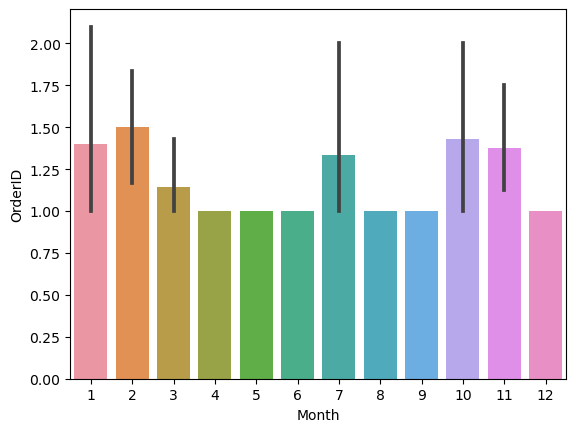

Safety Shoes 




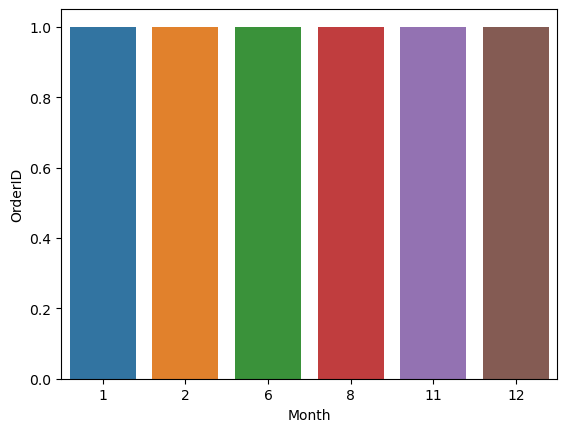

Slippers 




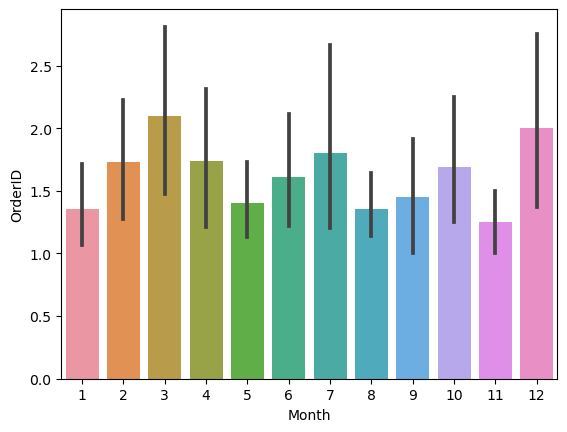

Wedge Slippers 




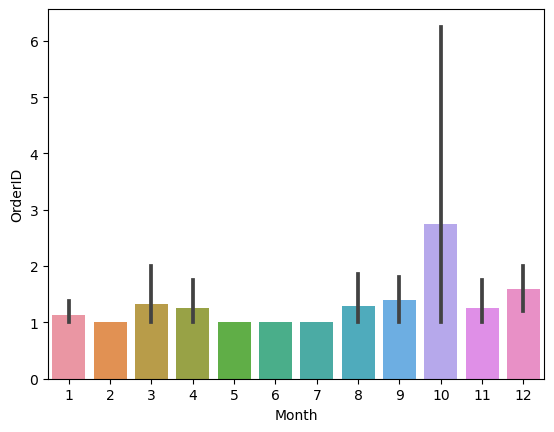

Woven Caps and Hats 




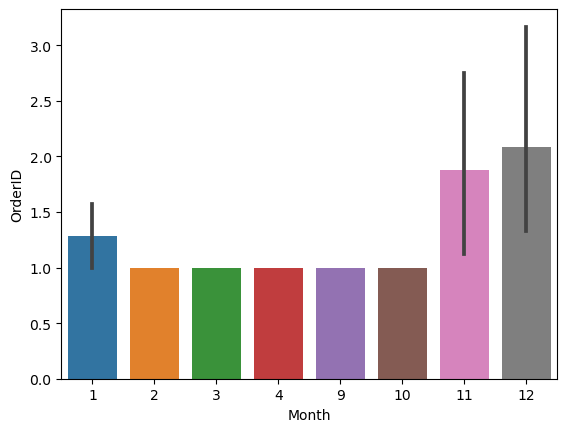

Woven Gloves 




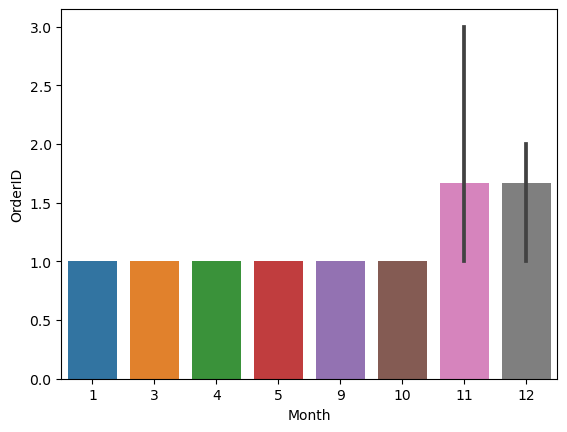

Woven Socks 




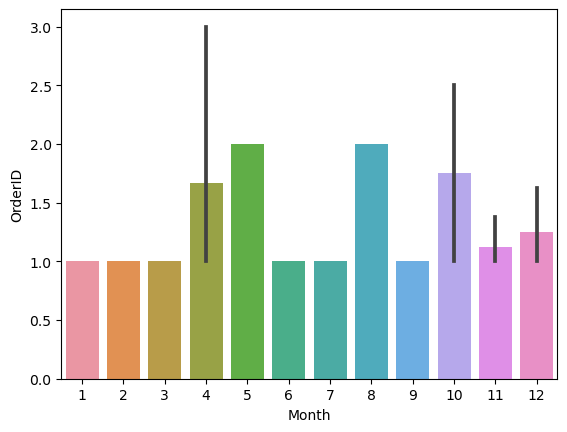

EVA Sandals 




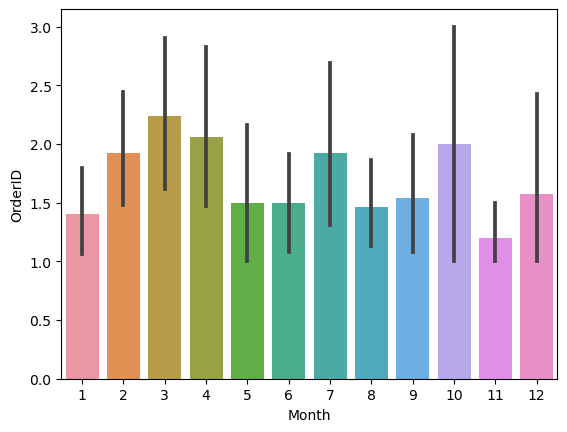

Knit Dresses 




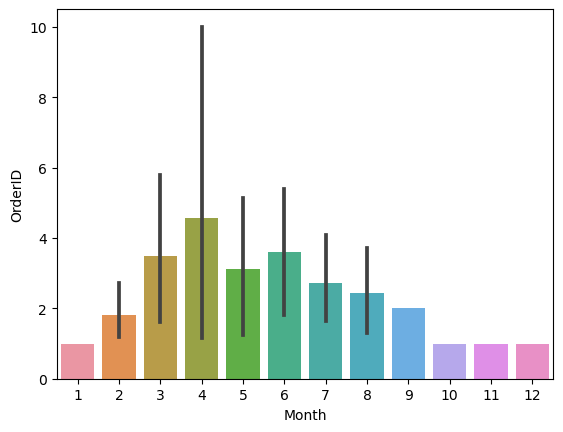

Knit Shorts 




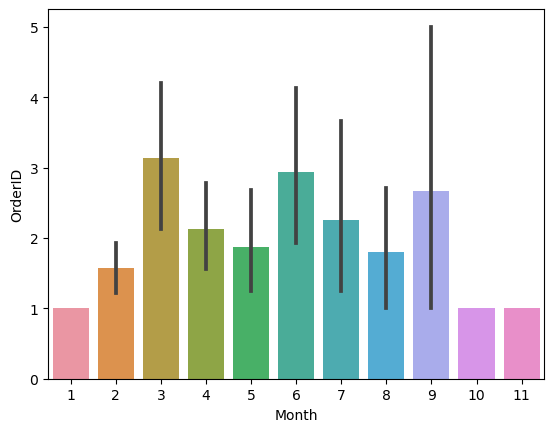

Knit T-Shirts 




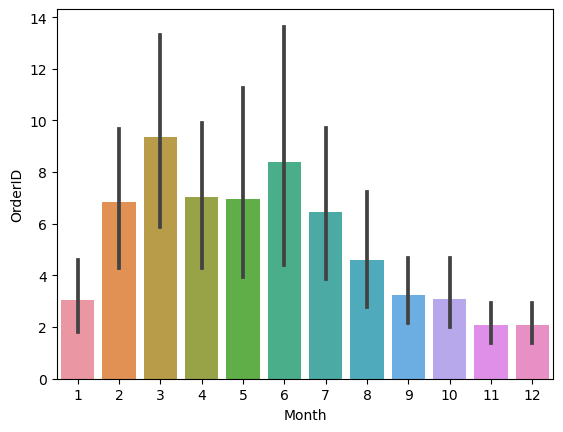

PVC Sandals 




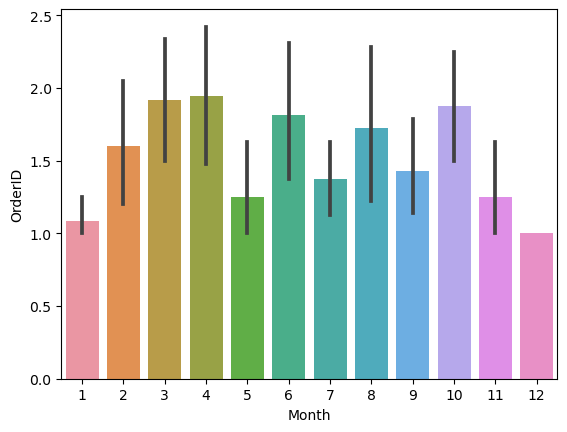

Woven Embroidered Suit & Dresss Material 




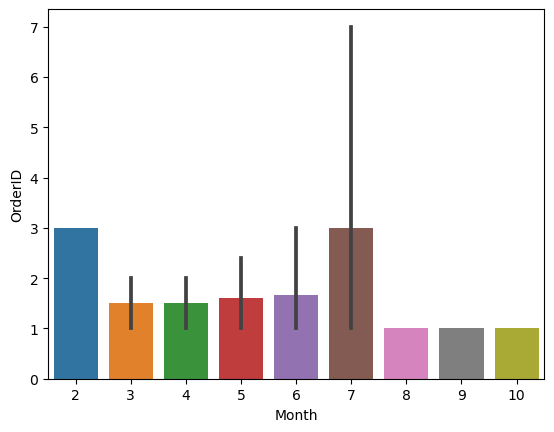

Woven Screen Print Kurtis 




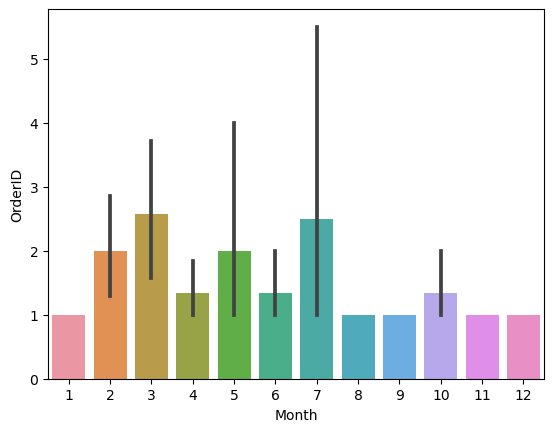

Full Moulded PVC Shoes 




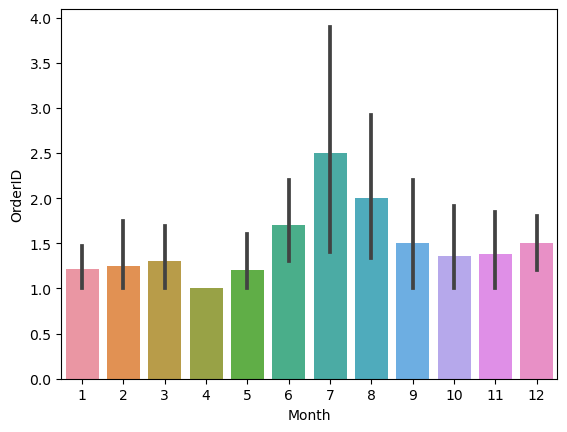

Full Moulded PVC Slippers 




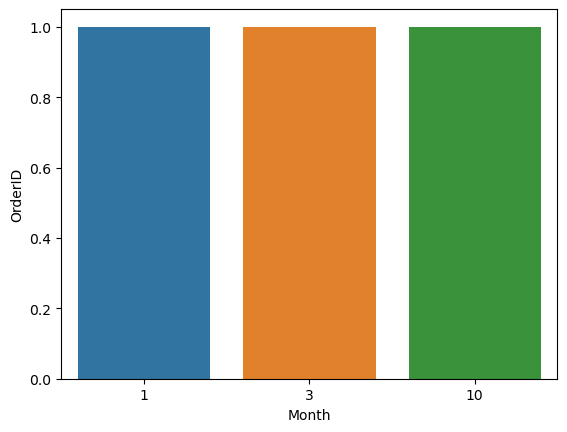

Leather Boots 




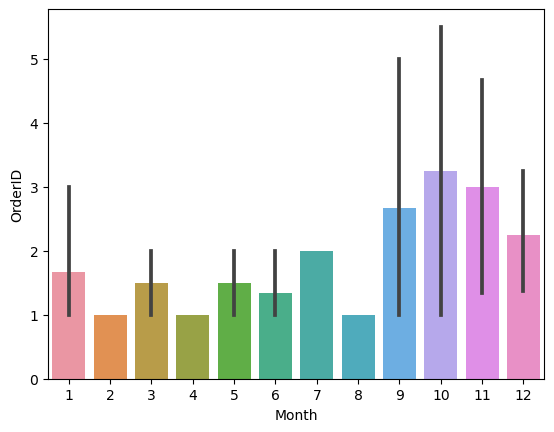

Nagra Shoes 




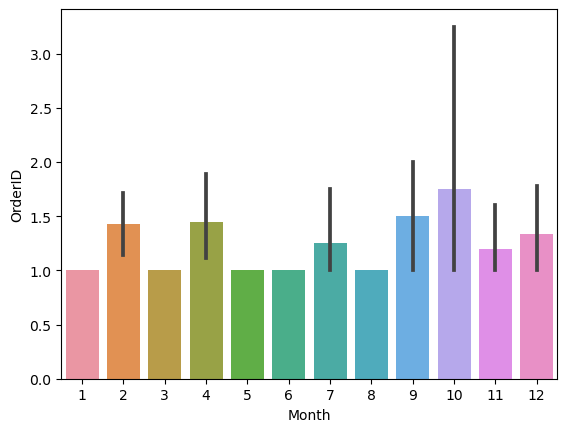

Phylon Sandals 




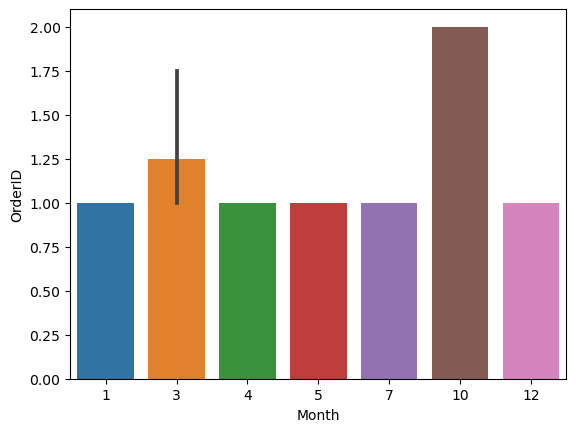

Phylon Sport Shoes 




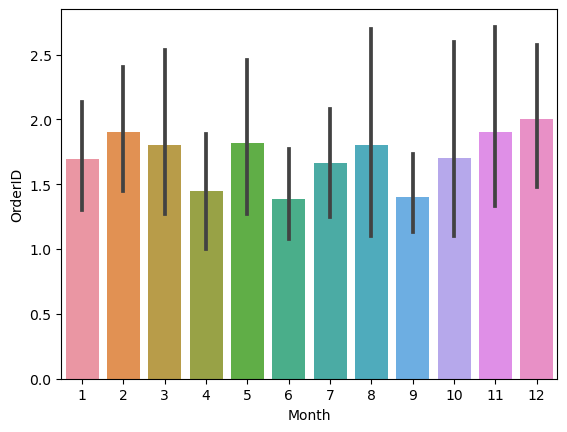

Rubber/TPR Sport Shoes 




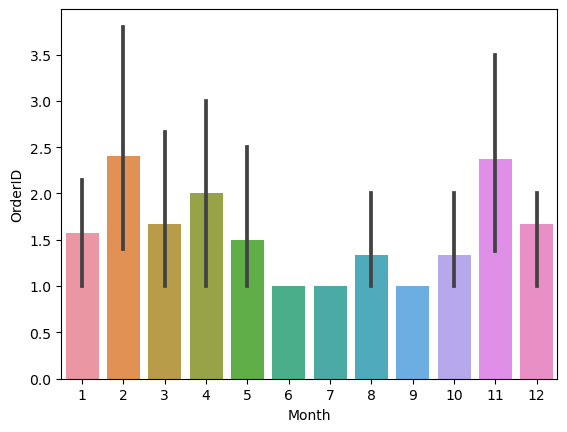

Sandals 




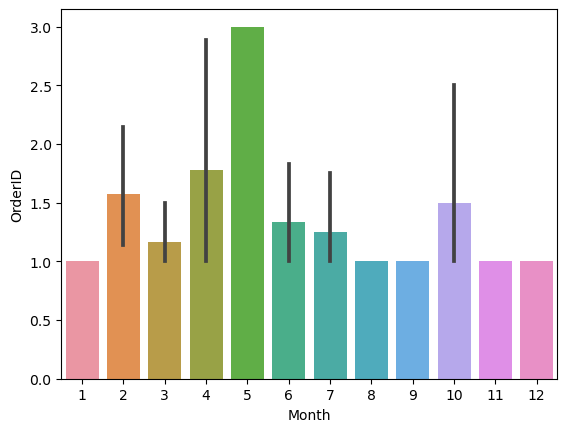

PU Canvas/Sneakers 




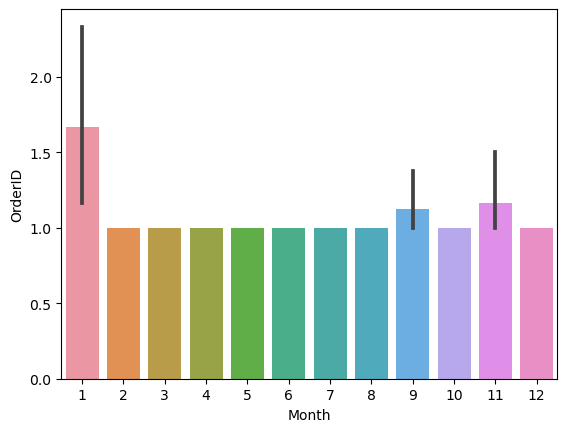

EVA Canvas/Sneakers 




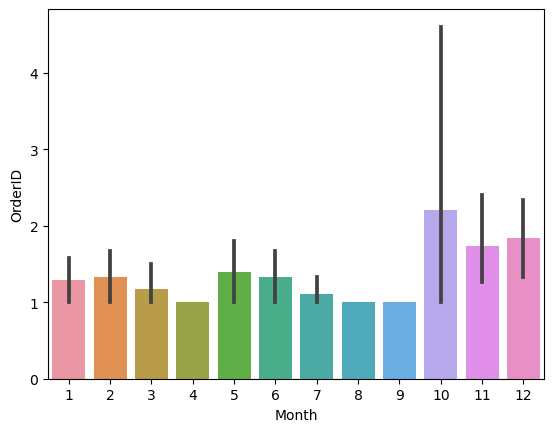

Knit Bra 




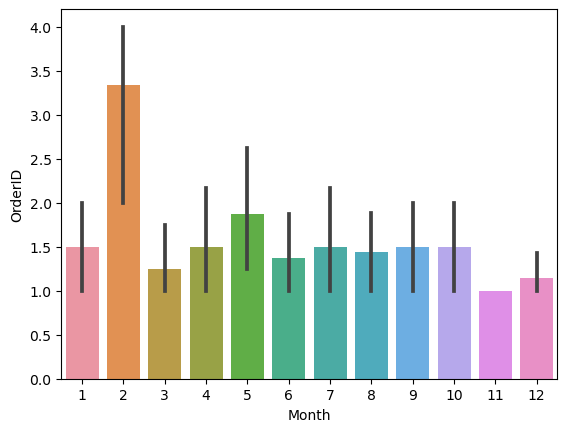

Knit Panties 




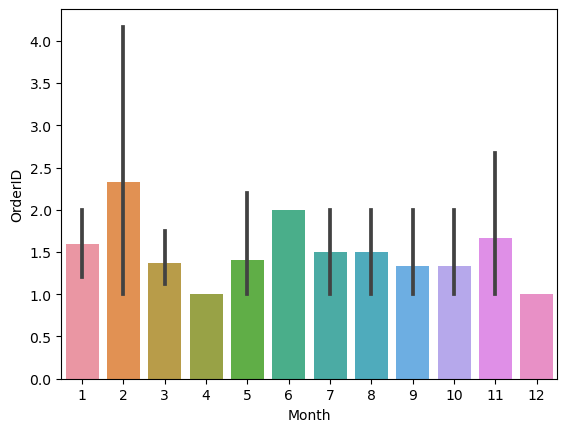

Knit Track Pants/Lowers 




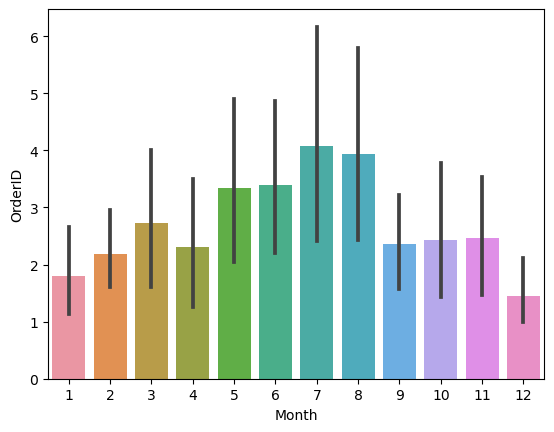

Leather Flat Bellies 




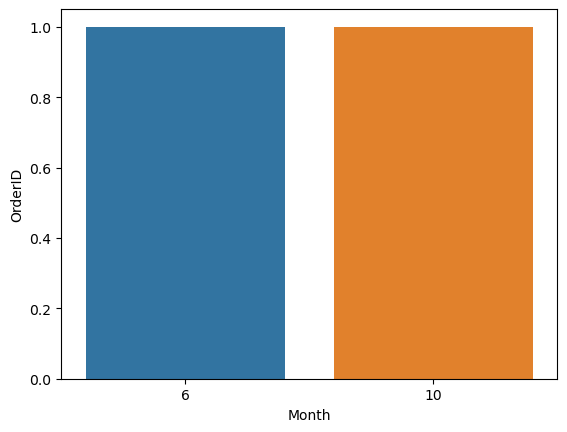

Woven Jacquard Sarees 




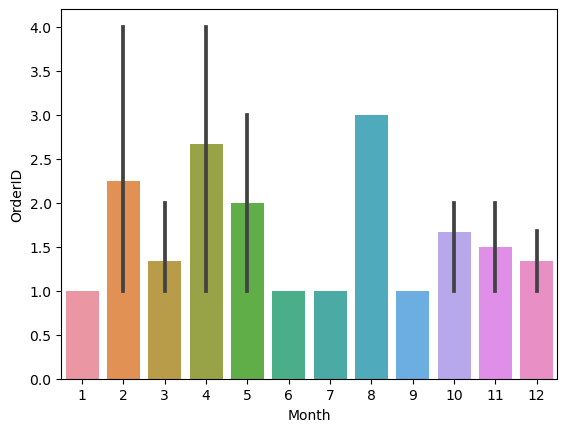

Woven Jeans 




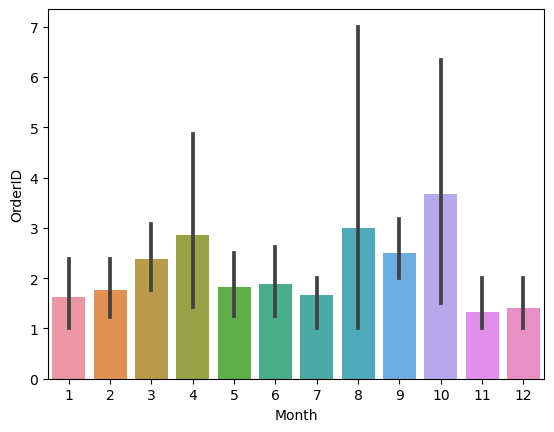

Woven Mill Print Kurtis 




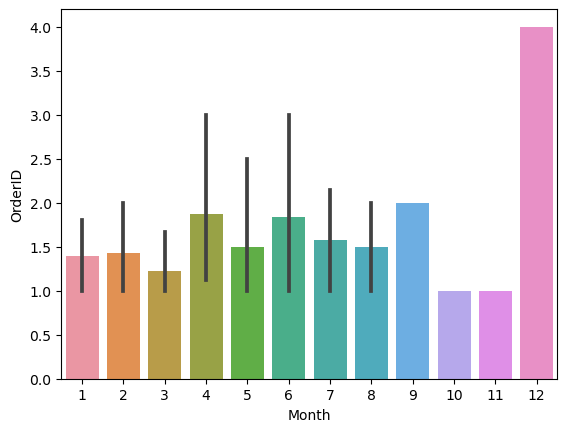

Woven Mill Print Sarees 




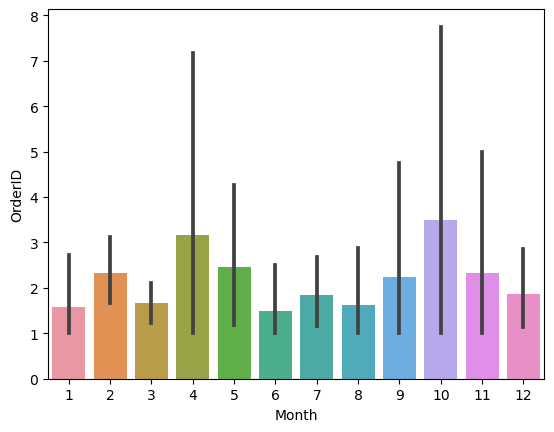

Leather Loafer Shoes 




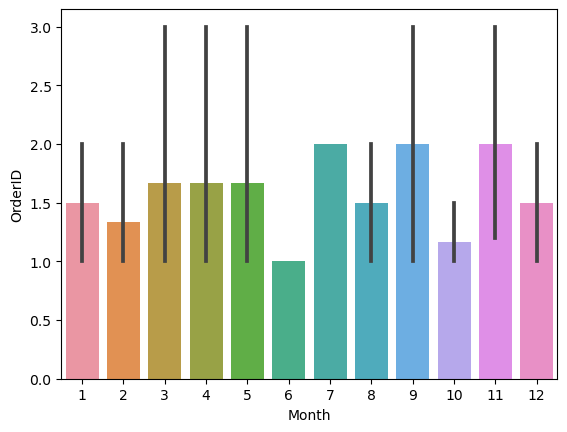

Leather Slippers 




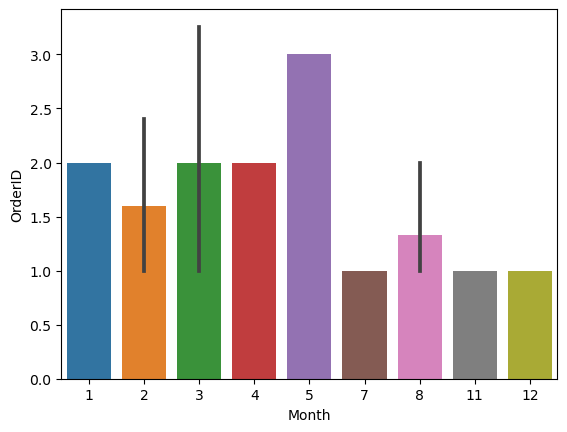

Roman Sandals 




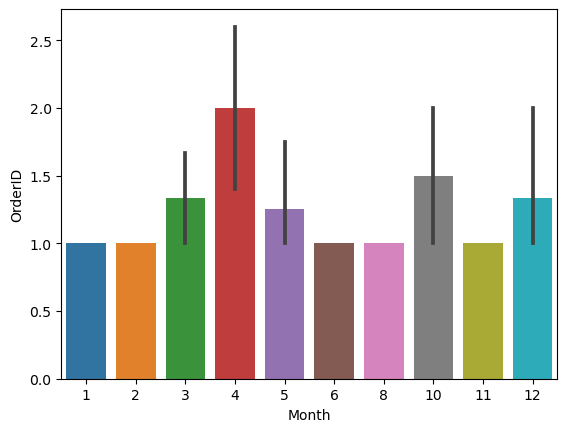

Woven Digital Print Sarees 




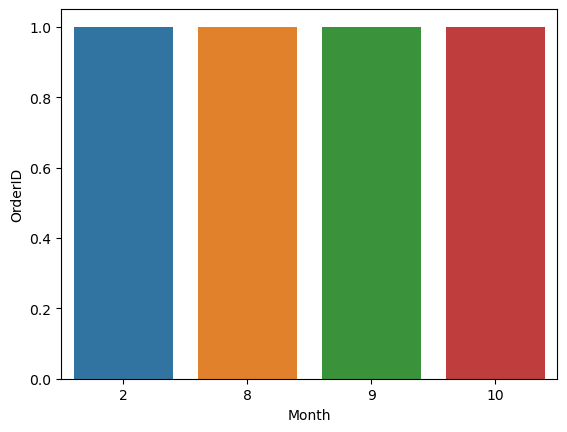

Knit Briefs (Underwear) 




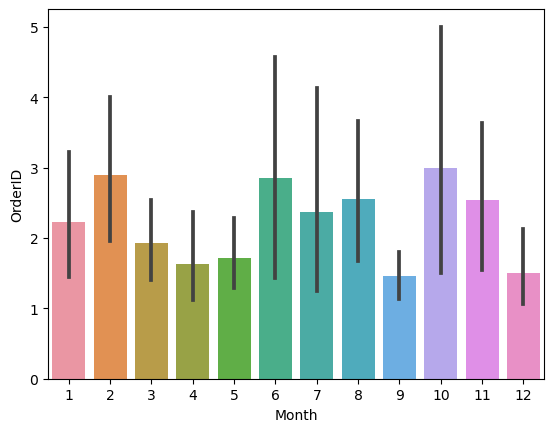

Knit Vests (Baniyan) 




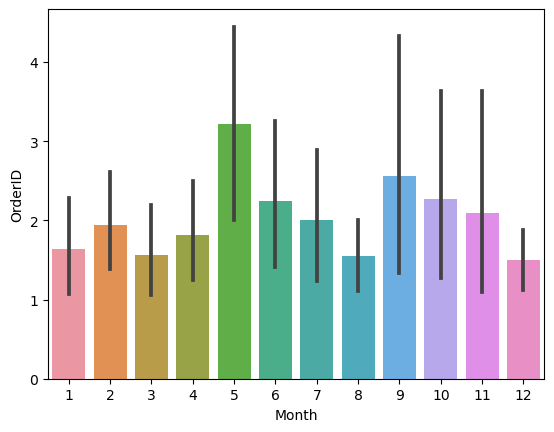

PU Ballies 




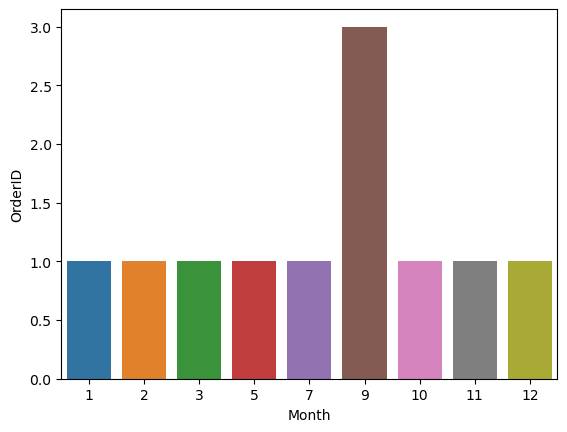

Woven Leggings 




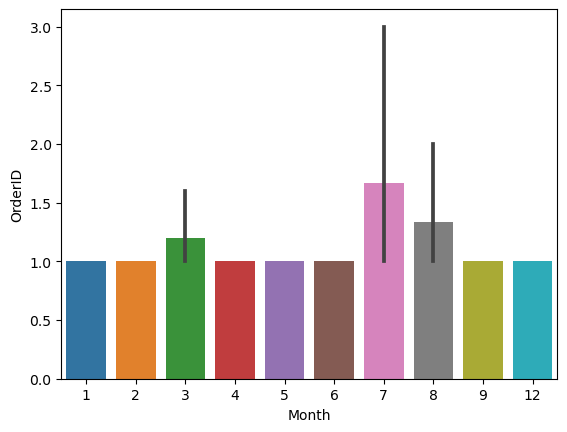

Woven Value Addition Kurtis (Hand and Stone Work) 




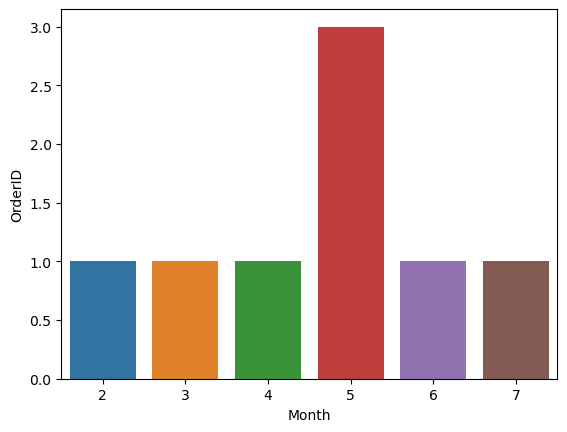

Woven Value Addition Sarees (Hand and Stone Work) 




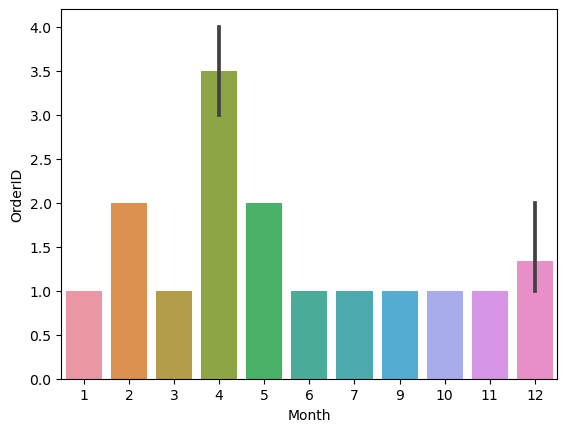

Dyed Blouse 




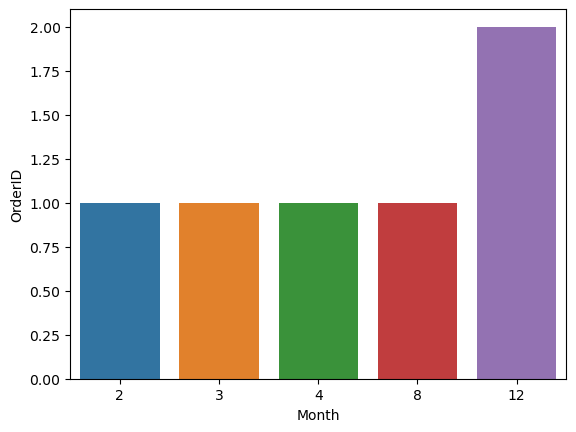

Knit Camisoles 




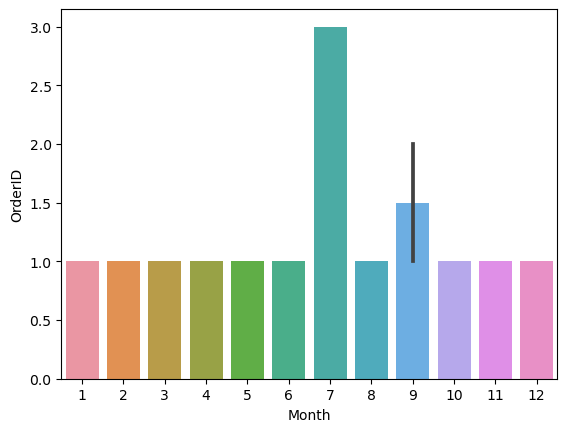

Knit Plazzos 




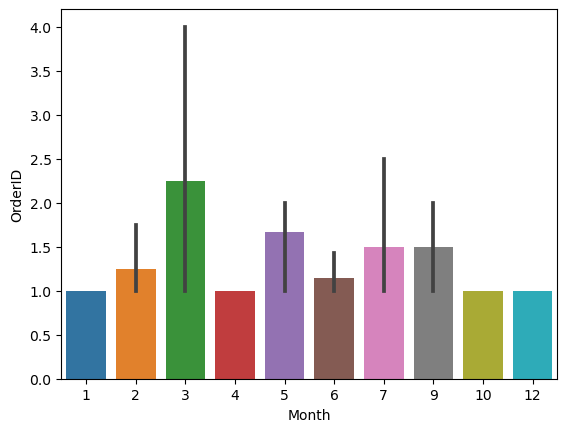

Kurtis Set 




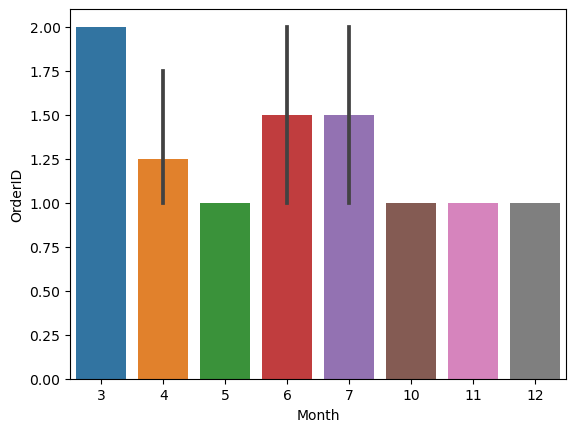

Leggings 




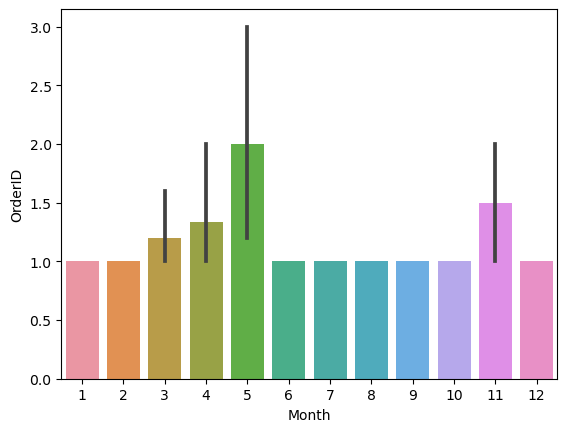

Plazzo (Woven) 




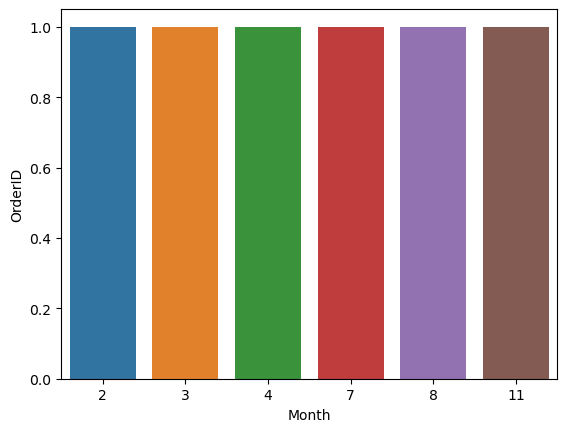

Woven Dyed Sarees 




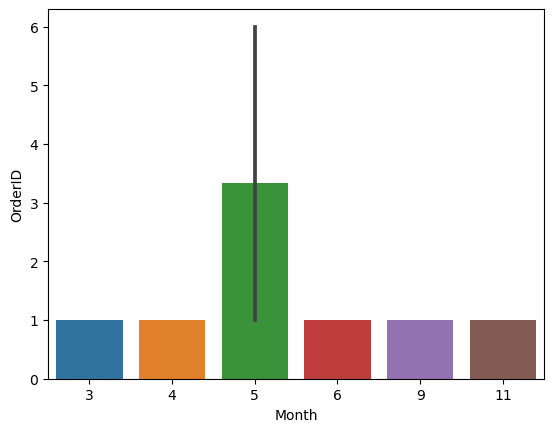

Woven Embroidered Sarees 




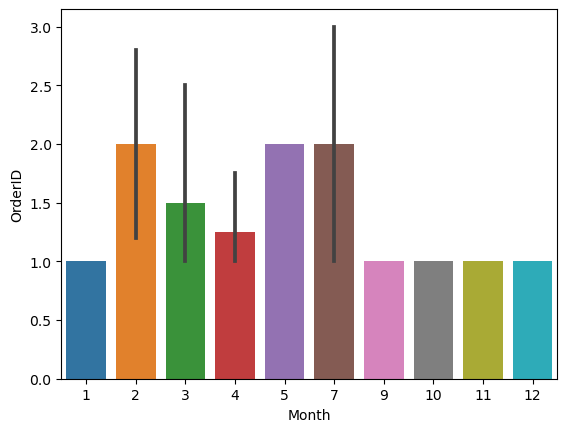

Woven Long Skirts 




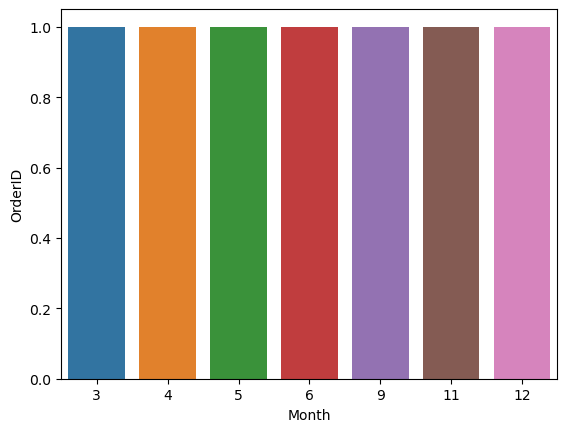

Woven Mill Print Dupattas 




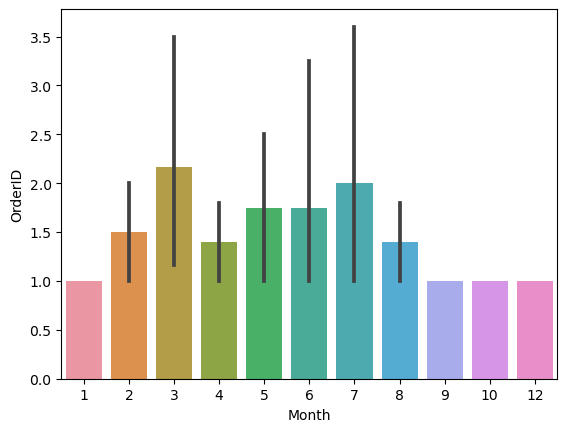

Woven Solid/Plain/Dyed Kurtis 




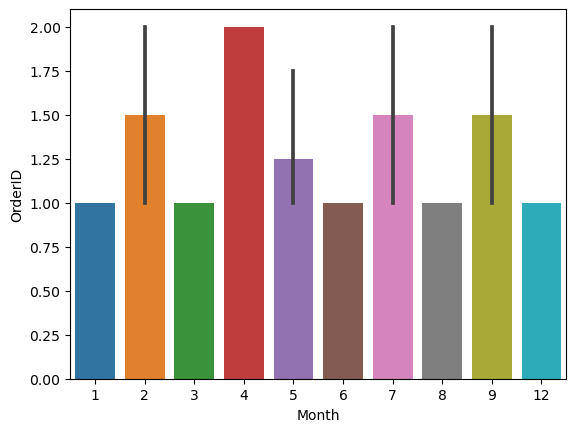

Woven Stoles & Scarves 




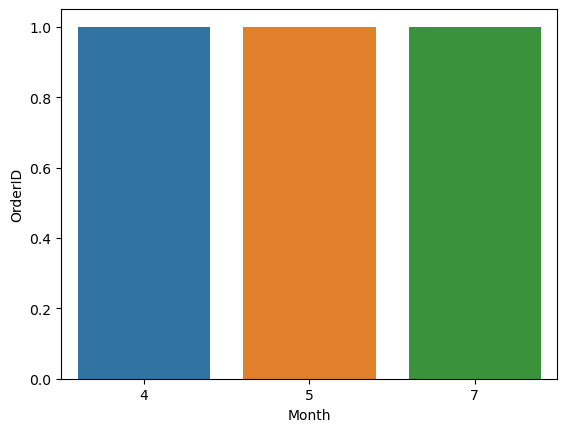

Leather Canvas/Sneakers 




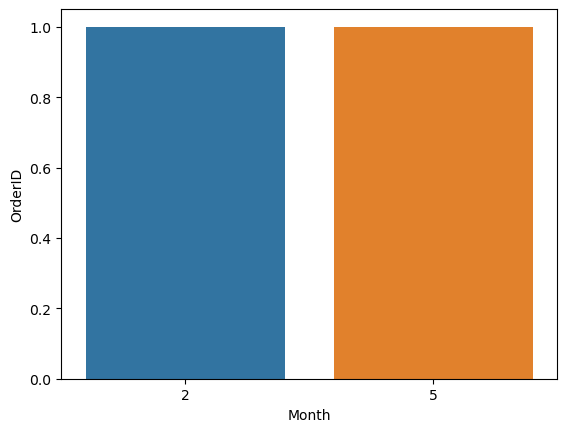

Leather Flat Sandals 




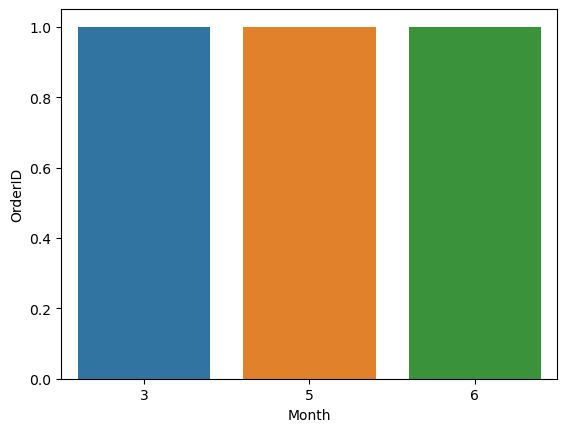

Leather Roman Sandals 




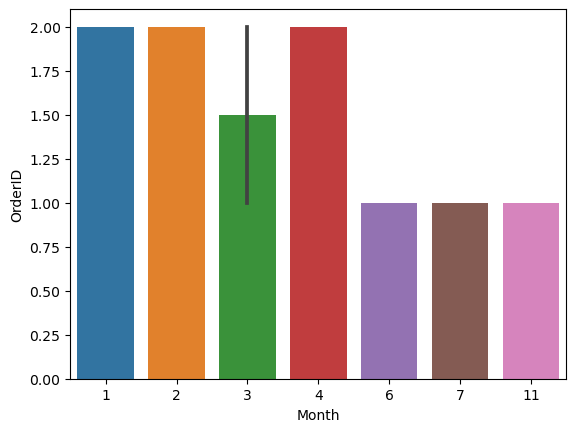

Leather Sandals 




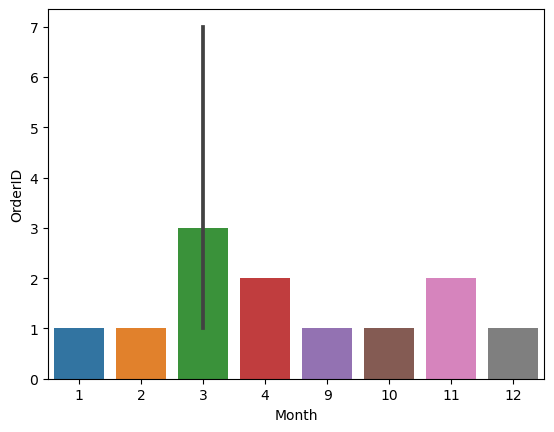

Synthetic Pasted Formal 




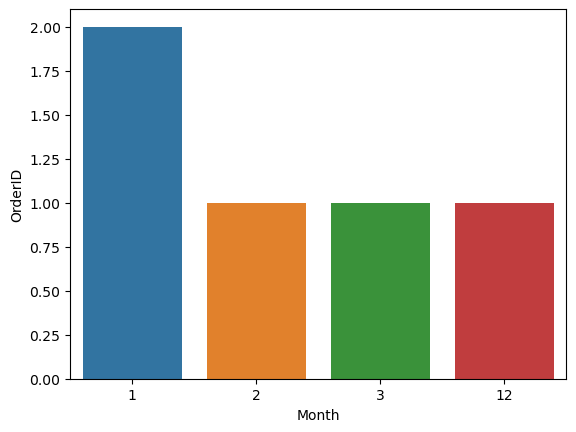

Knit Jackets 




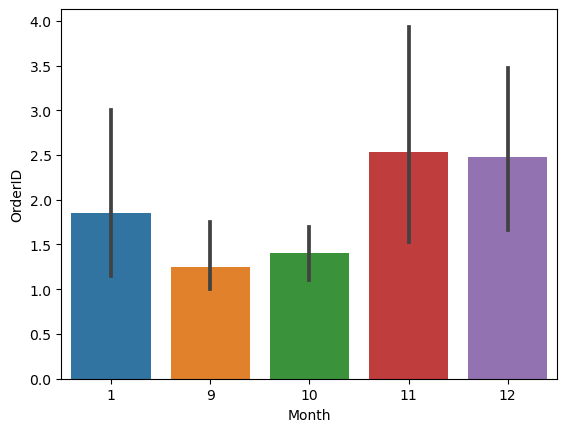

Knit Jeggings 




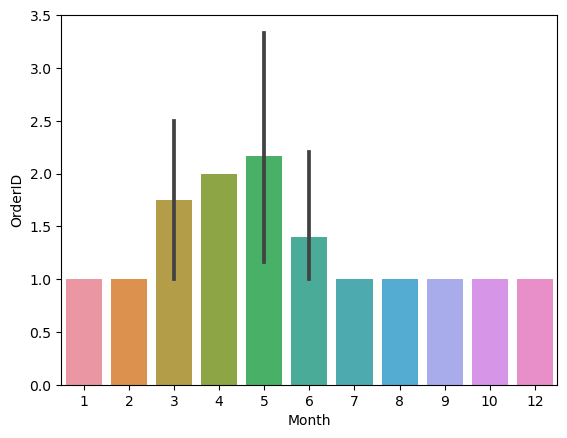

Knit Shirts 




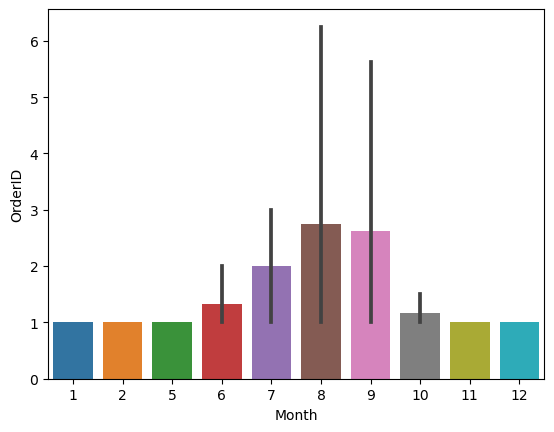

Knit Sweaters 




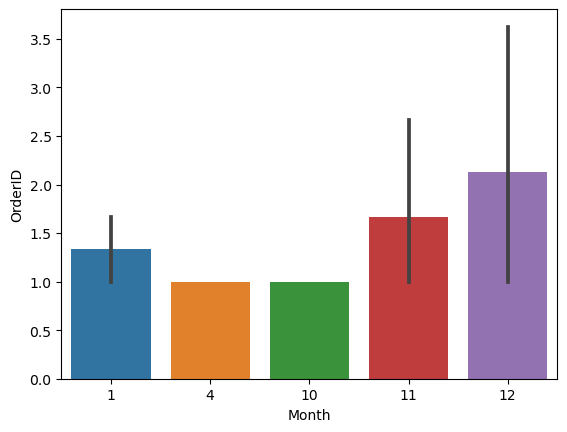

Leather Sport Shoes 




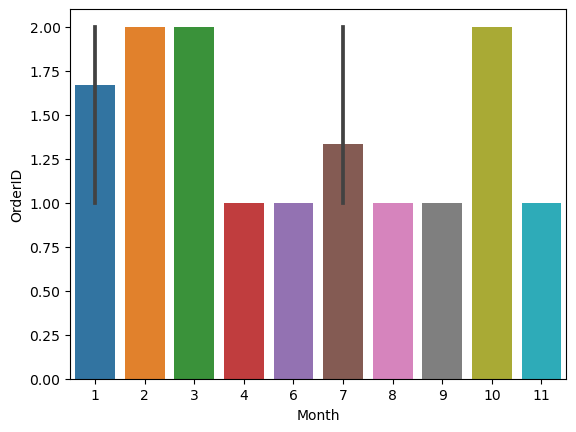

Non-Collar T-Shirts 




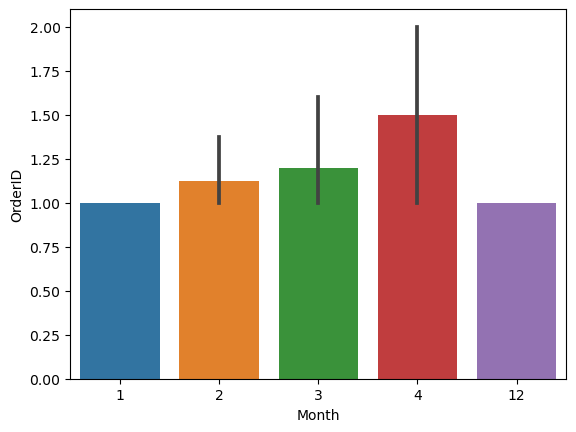

Shorts 




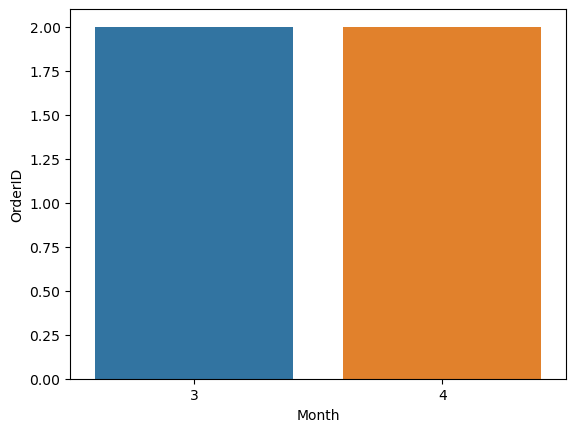

Synthetic Pasted Flat Slippers  




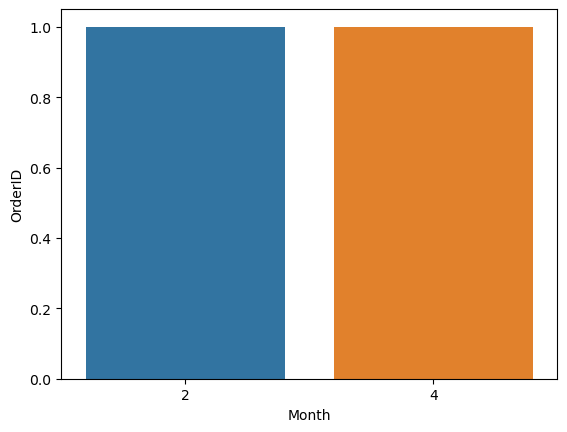

Woven Embroidered Dupattas 




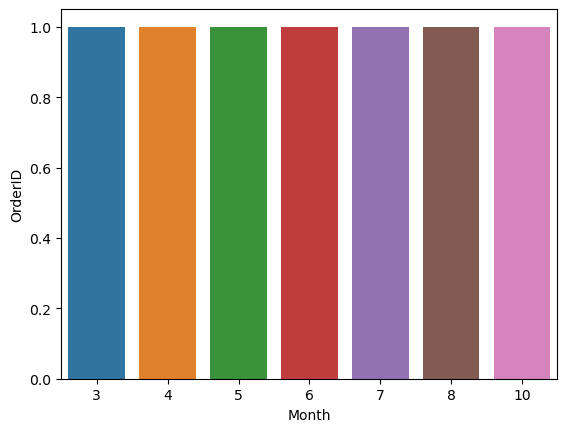

Phylon Slippers 




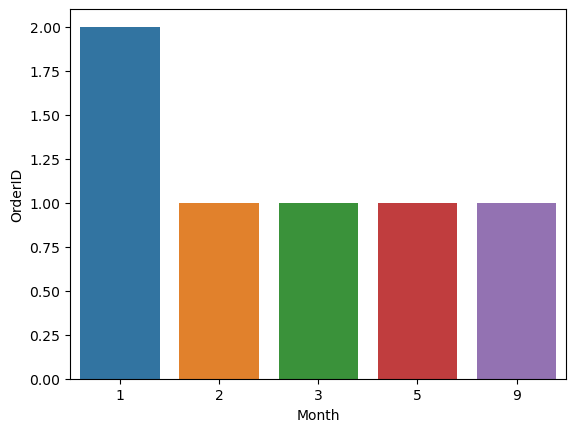

Rubber/TPR Sandals 




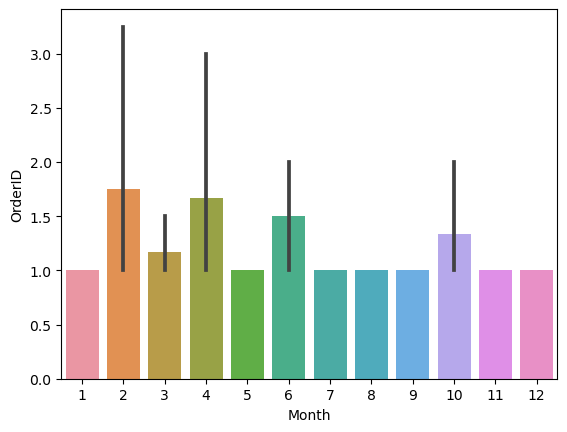

Woven Masks 




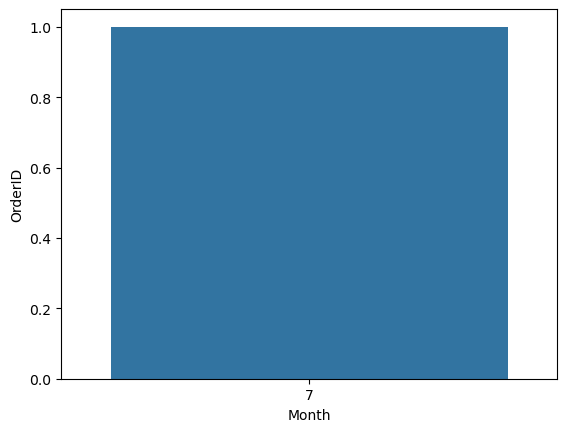

Knit Jeans 




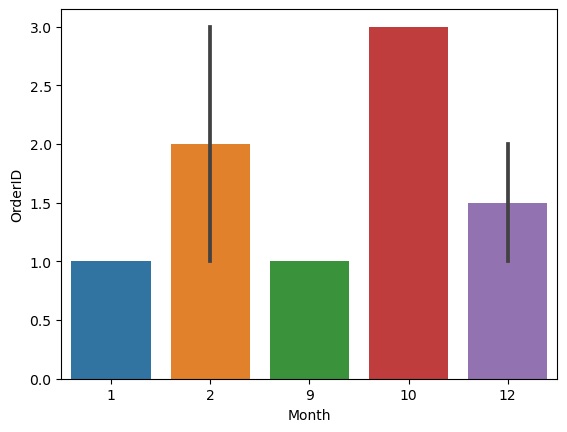

Kurti Set 




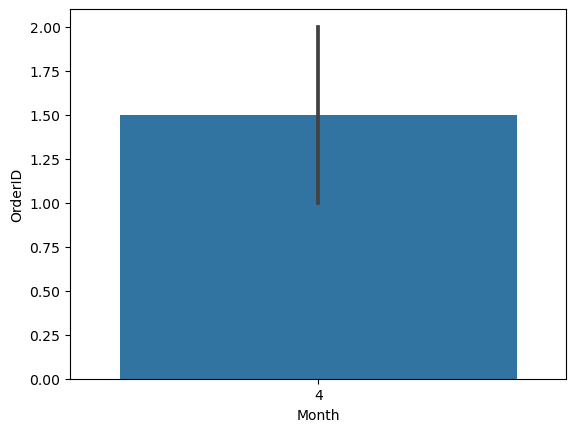

Leather Driving Shoes 




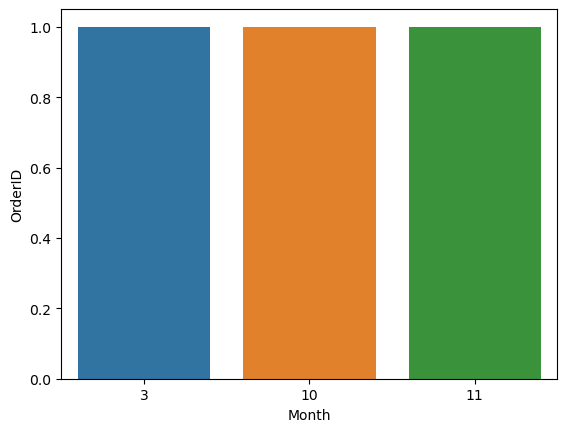

Woven Kurtas 




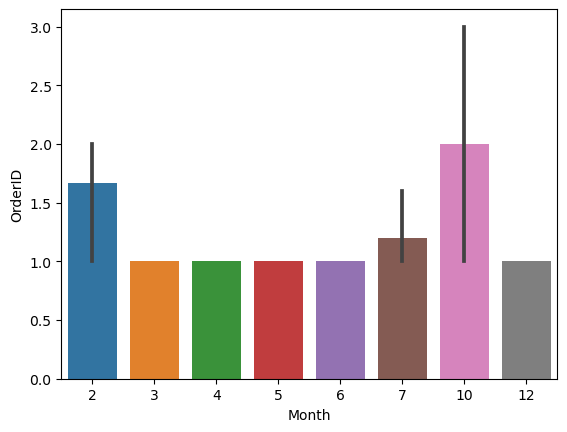

Woven Mill Print Suit & Dress Material 




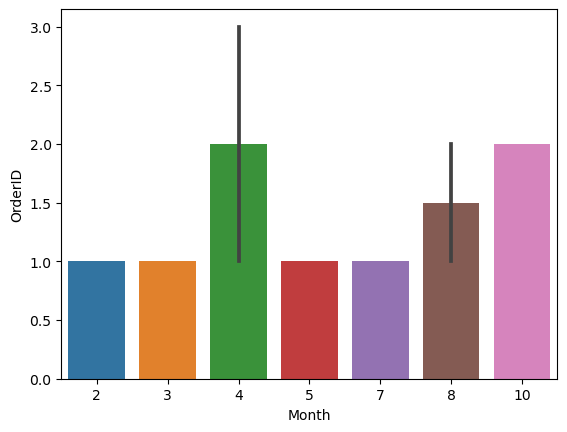

Leather Safety Shoes 




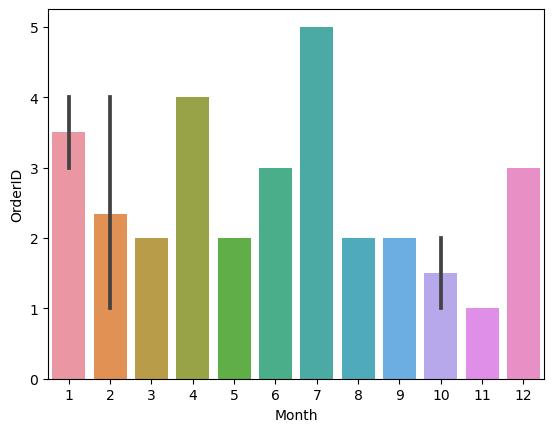

Full Moulded EVA Sandals 




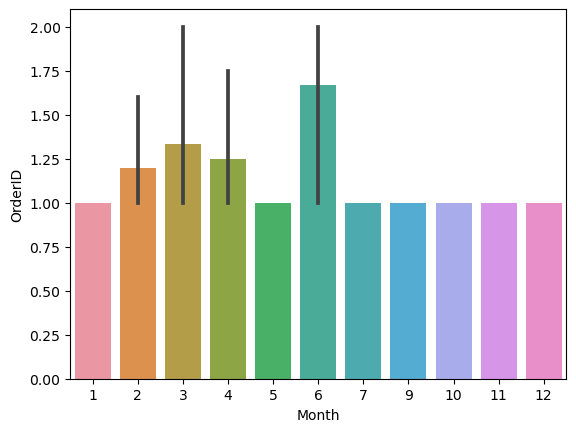

Synthetic Pasted Loafer 




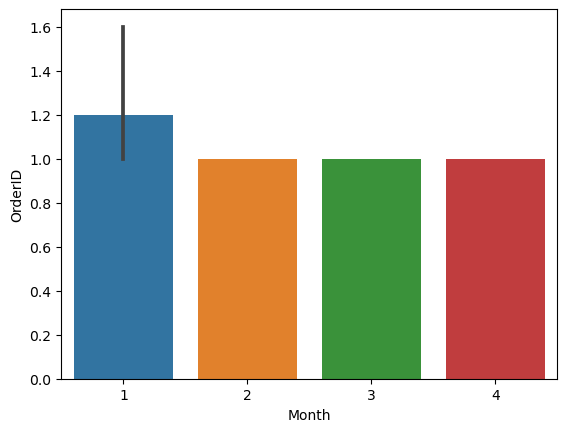

Tops 




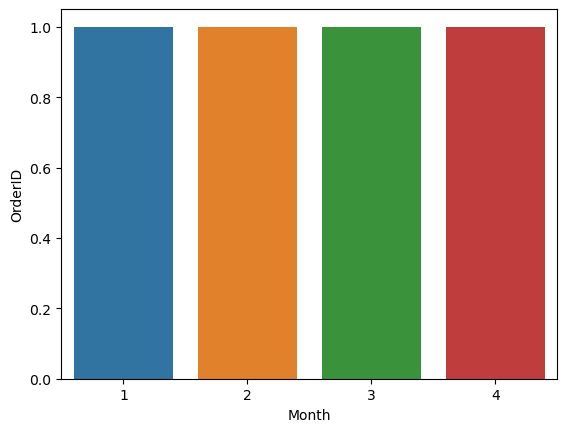

Woven Jacquard Blouses 




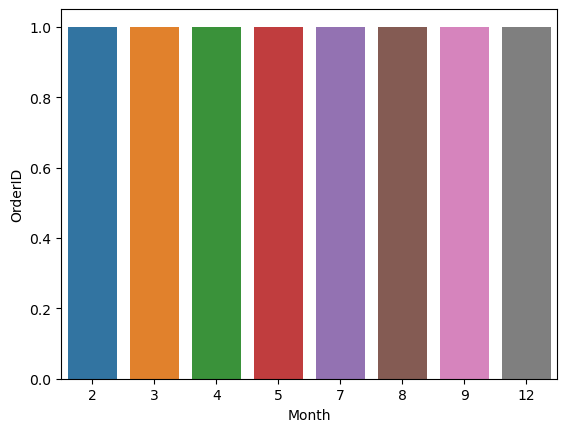

Woven Screen Print Dupattas 




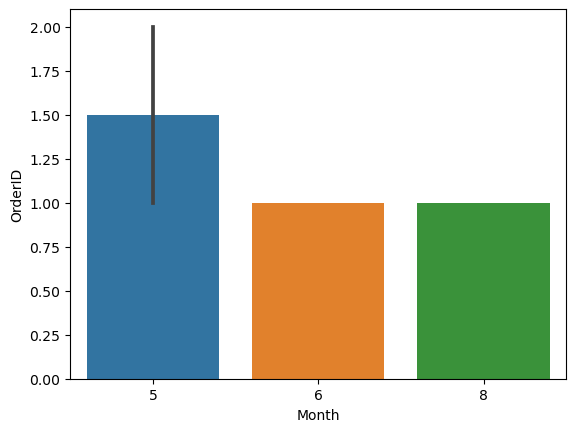

Heel Slippers 




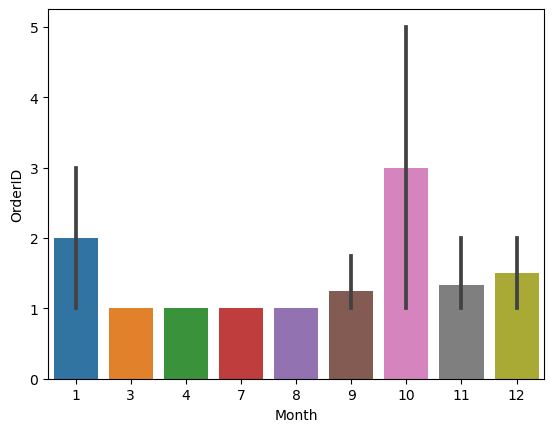

Eva Full Moulded Sandals 




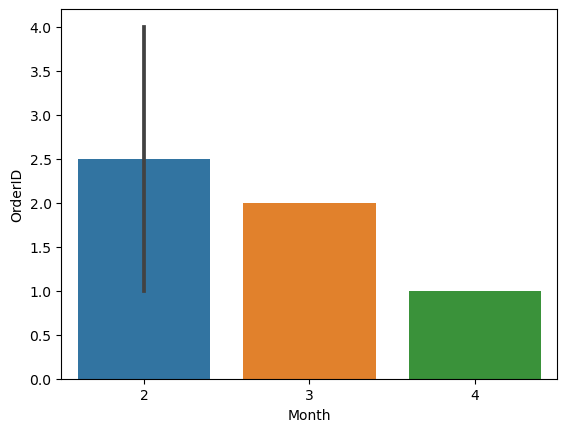

Full Moulded PVC Ballies 




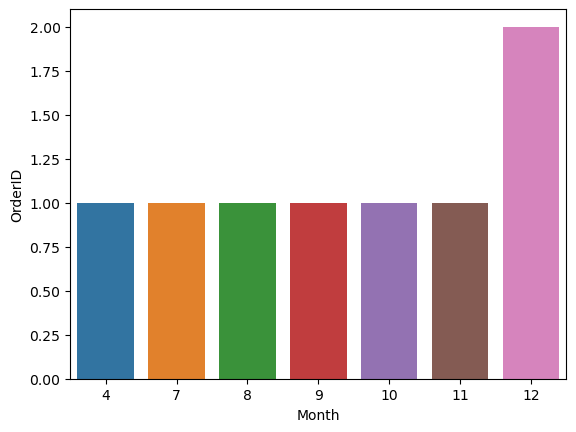

EVA Boots 




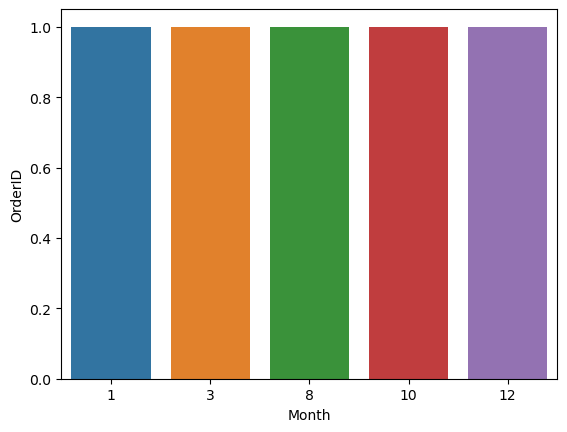

Knit Lingeries 




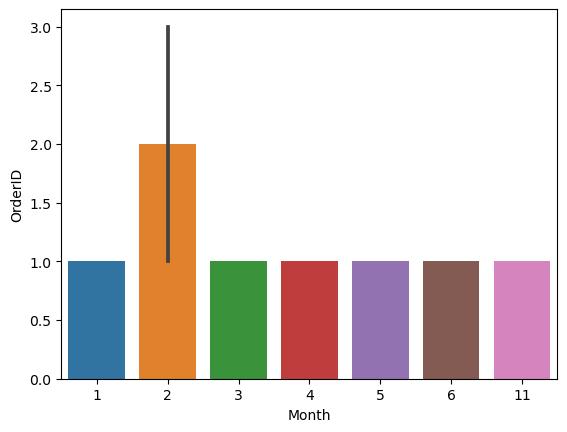

Jeans 




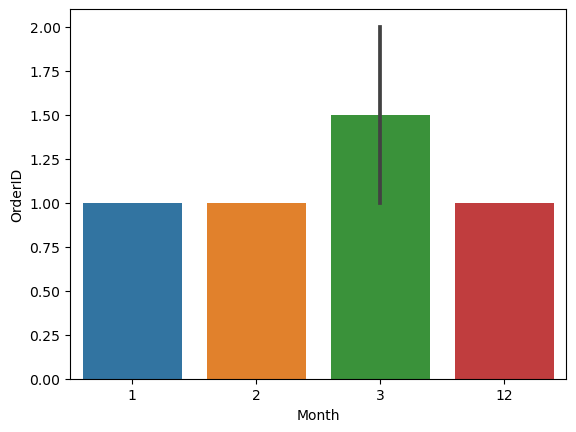

Knit Short Skirts 




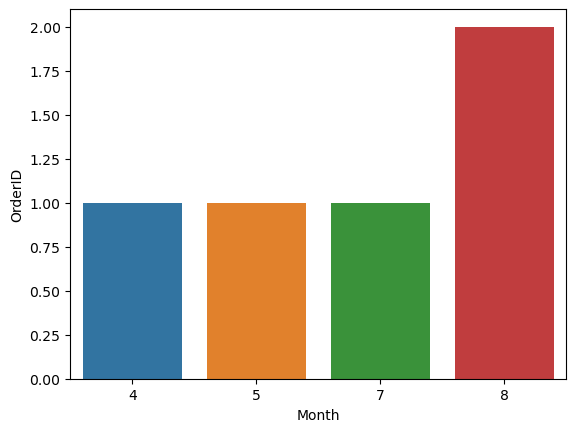

Woven Digital Print Kurtis 




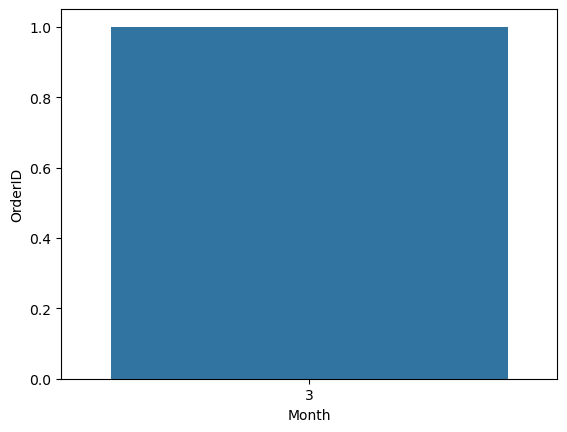

Eva Full Moulded Slippers 




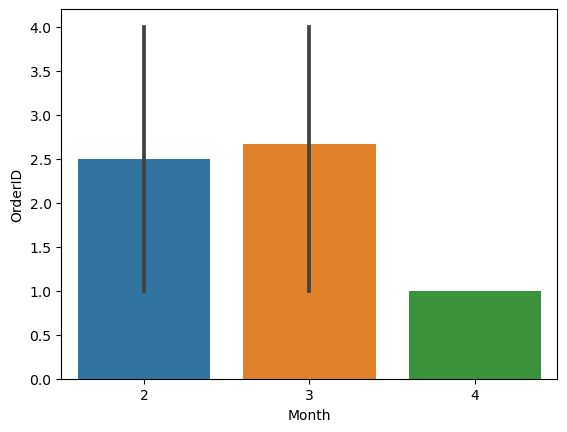

Shirts 




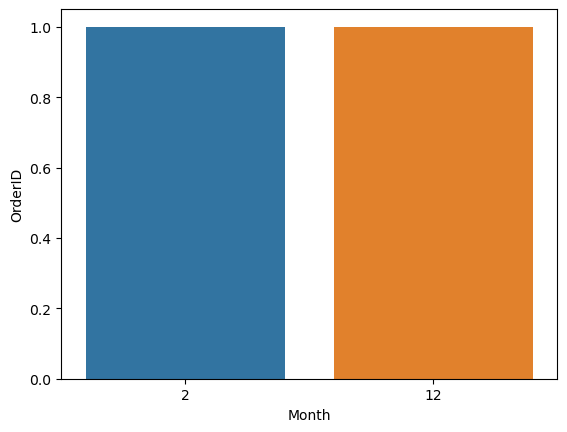

Track Pants 




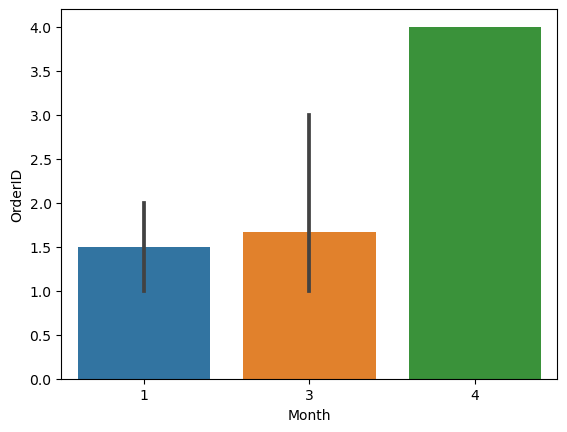

Woven Denim Jacket 




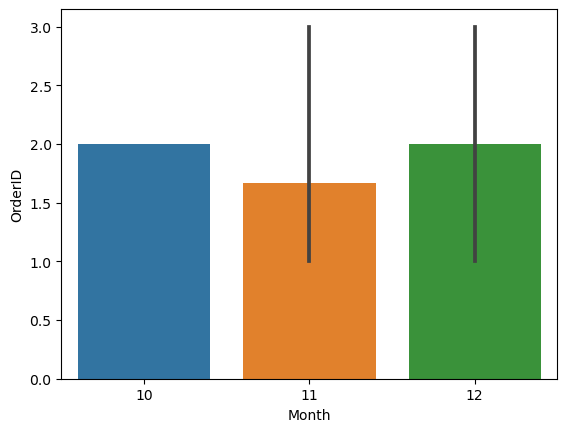

Woven Mufflers 




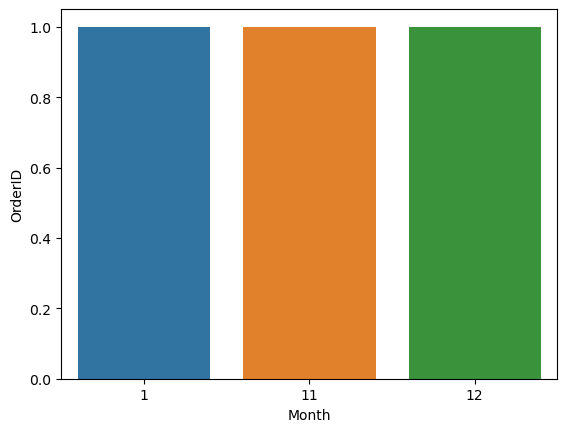

Synthetic Pasted Sliders 




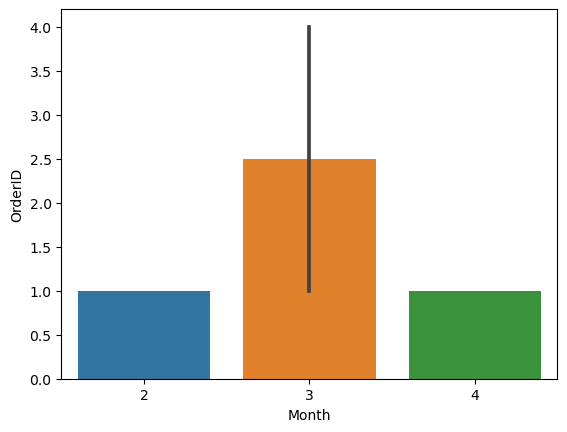

Synthetic Stitch Loafer 




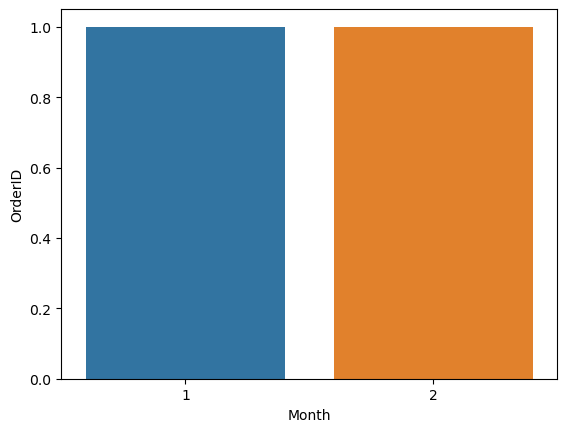

Dupatta 




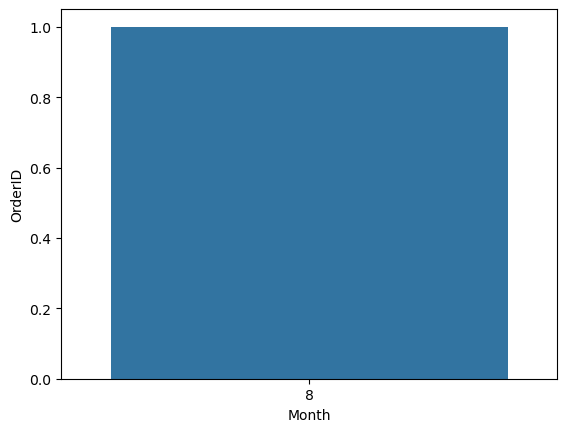

EVA School Shoes 




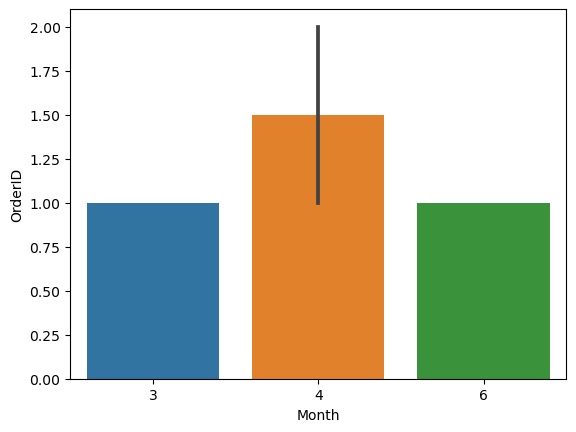

Synthetic Moulded Sports 




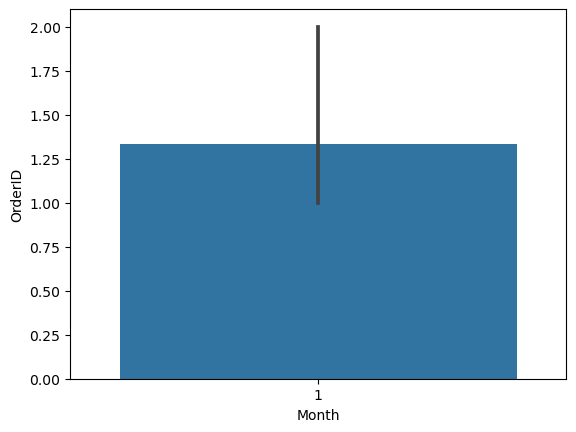

Synthetic Pasted Slippers 




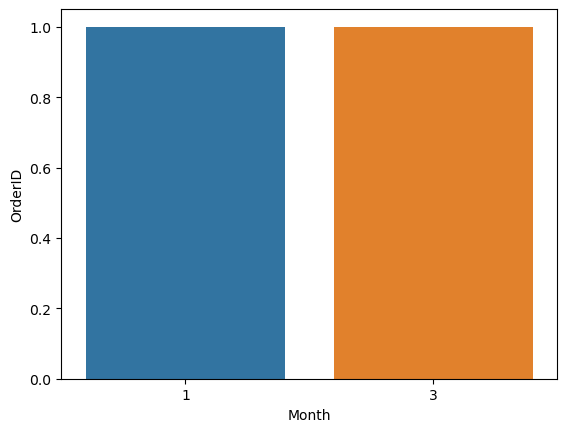

Woven Embroidered Blouses 




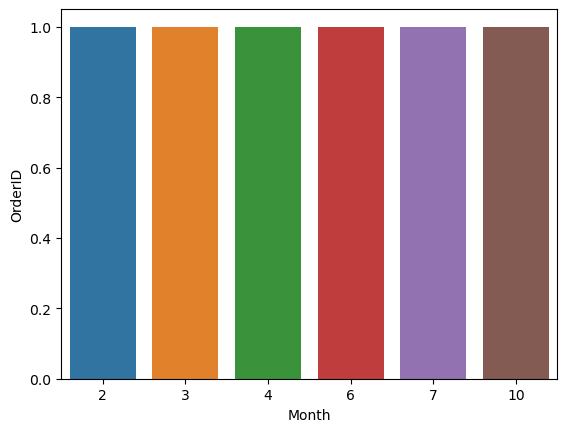

Woven Mill Print Blouses 




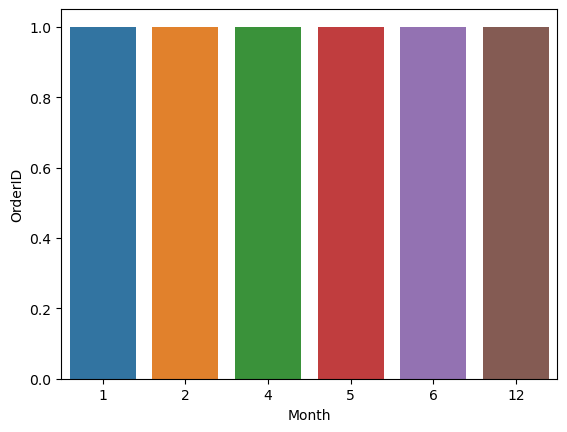

Leather Nagra Shoes 




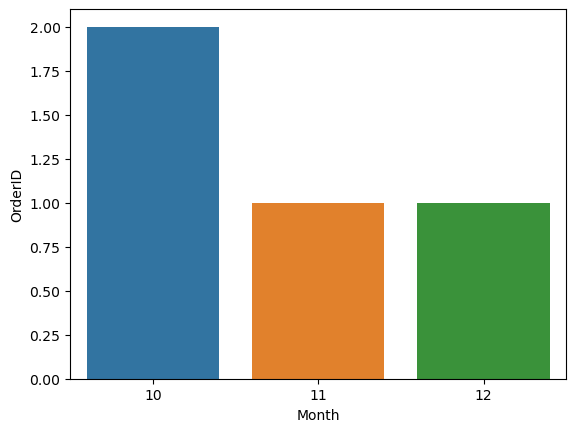

Woven Mill Print Suit & Dress Material (Stitched) 




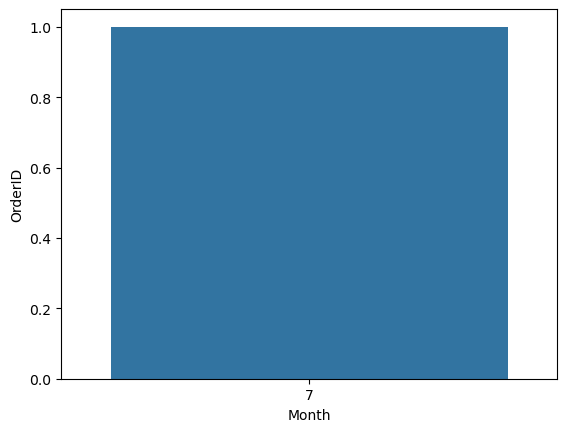

Collar T-Shirts 




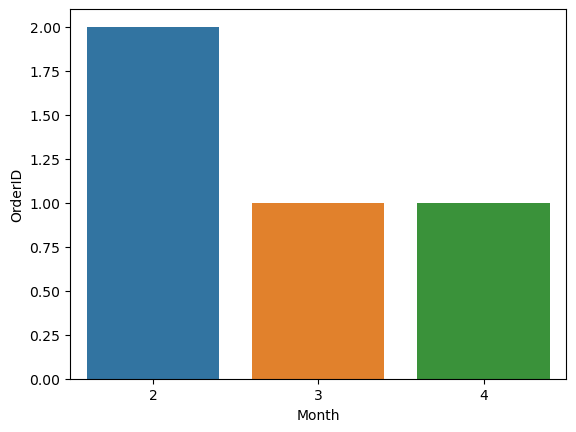

PU School Shoes 




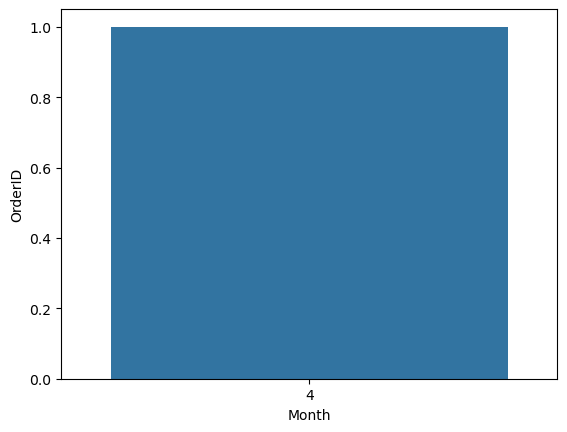

Shorts (Woven) 




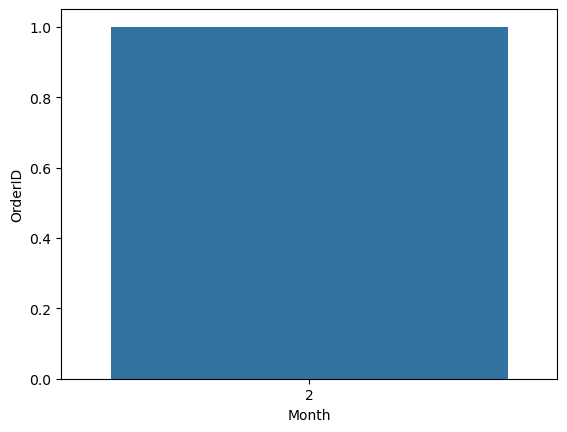

Synthetic Pasted Sneakers 




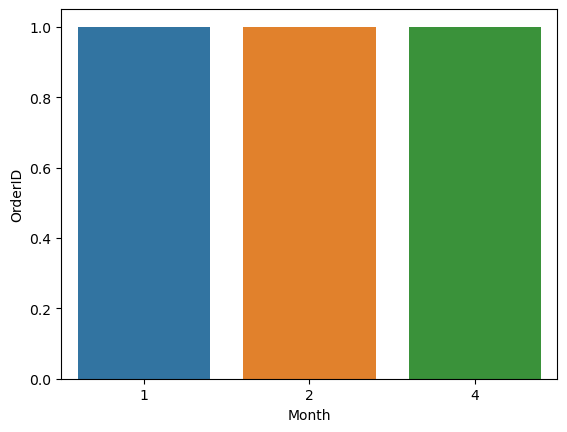

Top & Bottom Set 




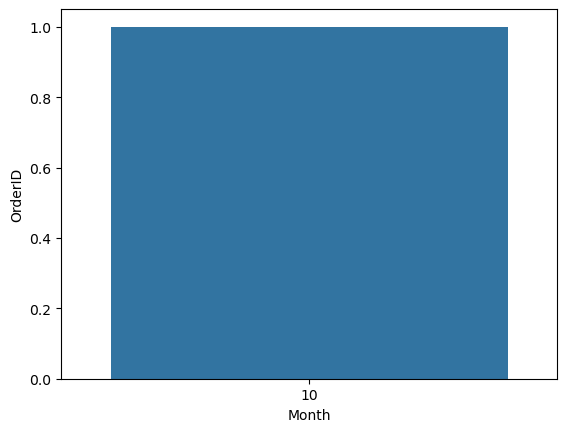

Woven Jacquard Lehengas 




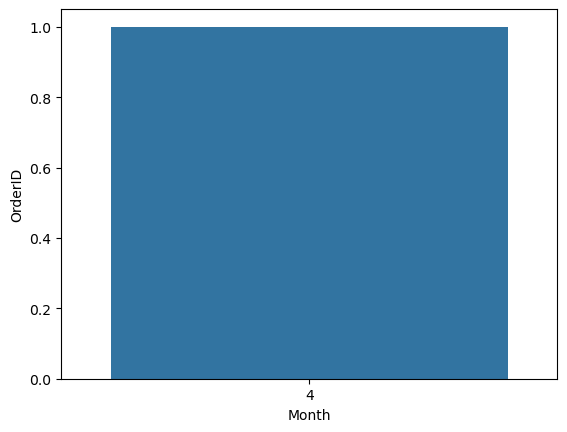

Synthetic Pasted Sports 




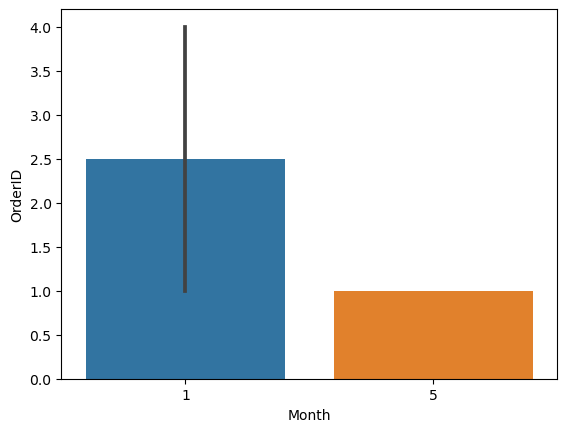

Full Moulded PVC Sandals 




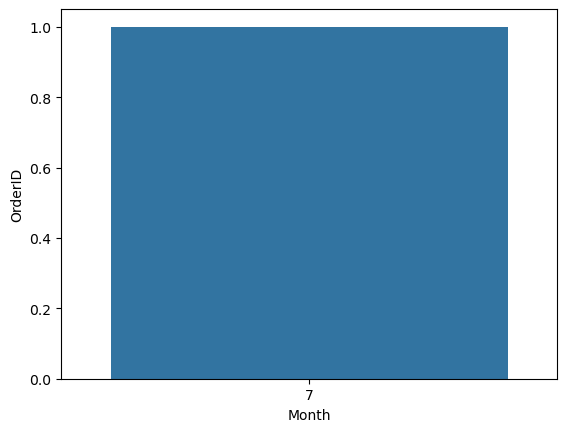

Rubber/TPR Boots 




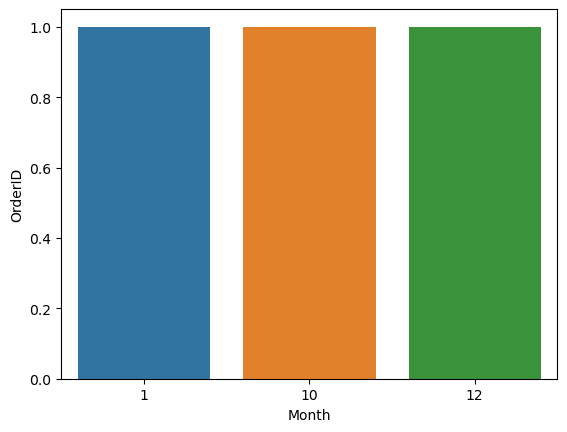

Rubber/TPR School Shoes 




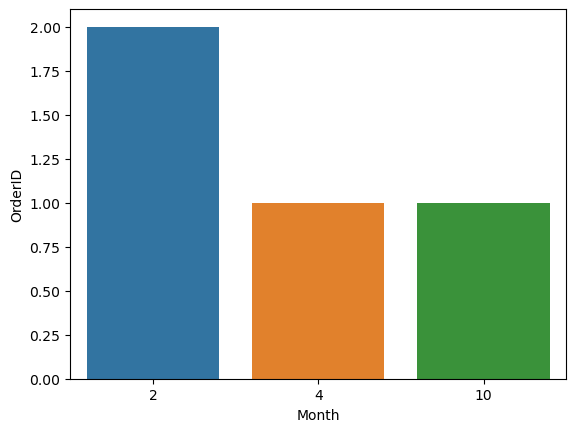

Synthetic Handmade Heel Sandals  




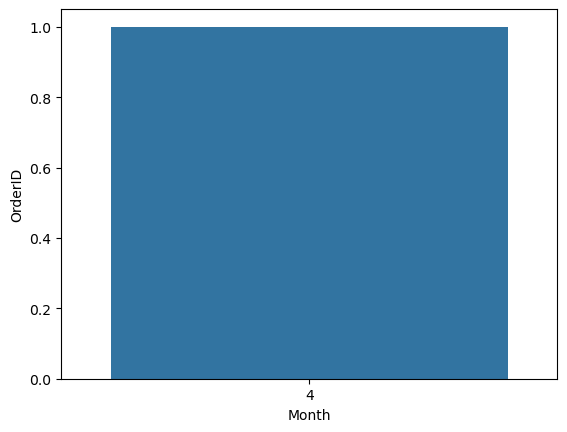

Synthetic Handmade Heel Slippers 




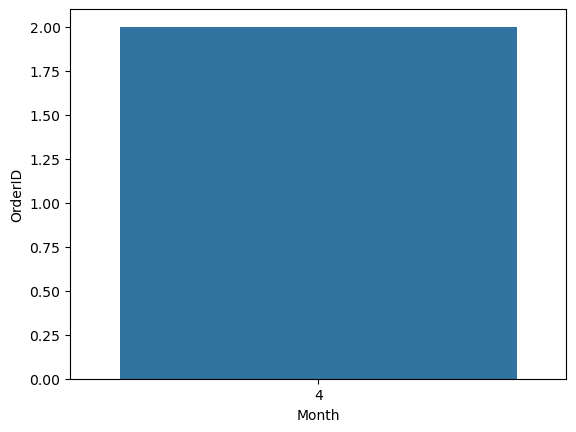

Woven Salwars 




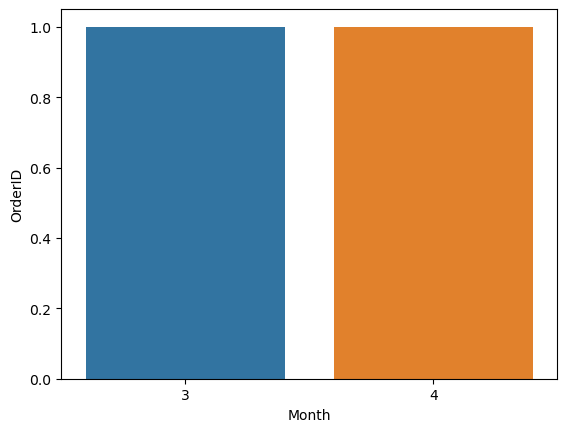

Winter Kurtis  




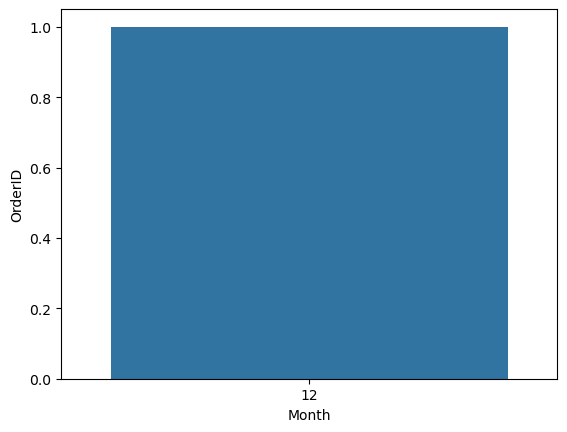

Woven Digital Print Lehengas 




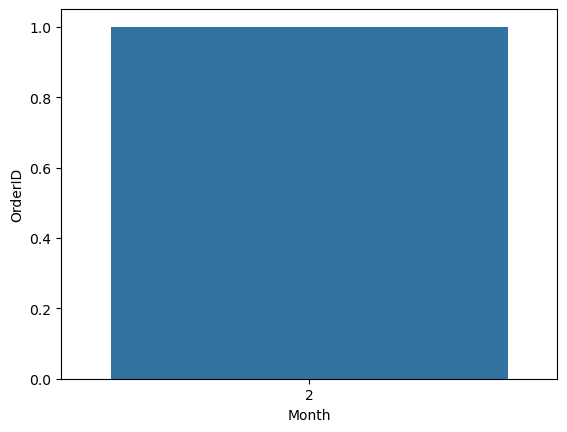

Jacquard Dupatta 




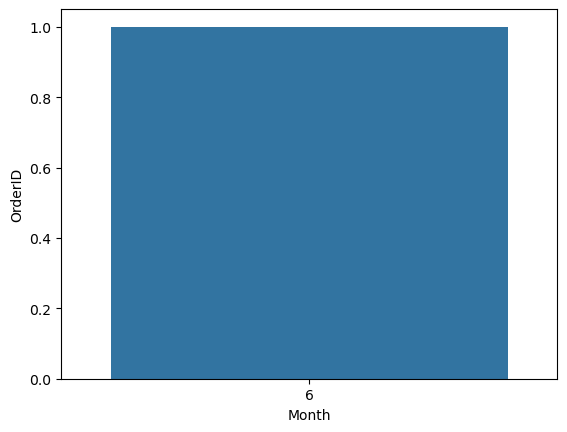

Woven Jacquard Suit & Dress Material 




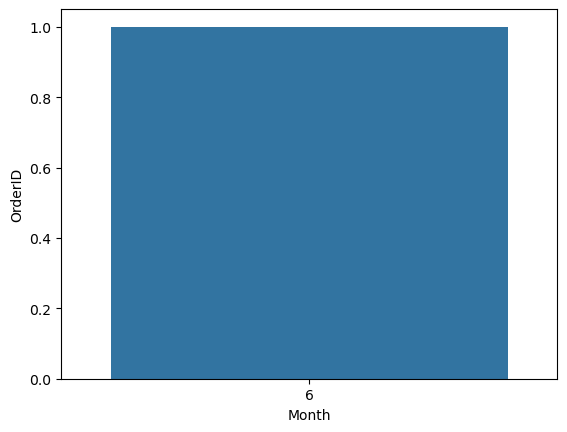

Woven Digital Print Suit & Dress Material 




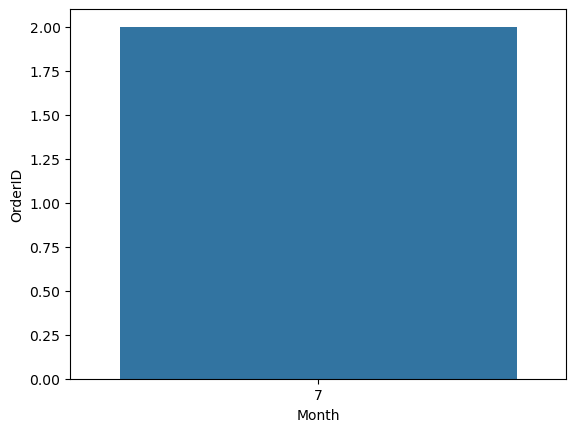

In [66]:
for i in subcat_seasonality_df_test.Sub_Category.unique():
    data = subcat_seasonality_df_test[subcat_seasonality_df_test.Sub_Category == i]
    fig = sb.barplot(data = data,y = data.OrderID,x = data.Month)
    print(i,'\n\n')
    plt.show()

<AxesSubplot:xlabel='Month', ylabel='Order_Scaled'>

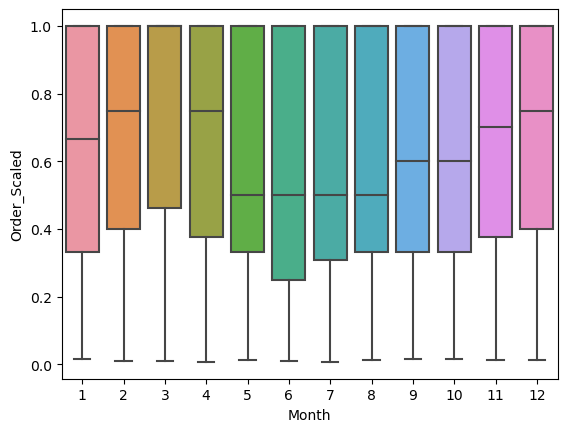

In [67]:
sb.boxplot(y = subcat_seasonality_df.Order_Scaled,x = subcat_seasonality_df.Month)

In [68]:
subcat_seasonality_df.columns = ['DelState', 'DelCity', 'PINCode','Sub_Category', 'Month', 'GMVSC', 'OrderSC',
       'UserSC', 'GMVSC_amax', 'GMVSC_amin', 'OrderSC_amax', 'OrderSC_amin',
       'UsersSC_amax', 'UsersSC_amin', 'GMVSC_Scaled', 'OrderSC_Scaled',
       'UserSC_Scaled']

In [69]:
subcat_seasonality_df.columns

Index(['DelState', 'DelCity', 'PINCode', 'Sub_Category', 'Month', 'GMVSC',
       'OrderSC', 'UserSC', 'GMVSC_amax', 'GMVSC_amin', 'OrderSC_amax',
       'OrderSC_amin', 'UsersSC_amax', 'UsersSC_amin', 'GMVSC_Scaled',
       'OrderSC_Scaled', 'UserSC_Scaled'],
      dtype='object')

In [70]:
user_pref_df.columns

Index(['UserID', 'DelState', 'DelCity', 'PINCode', 'Sub_Category', 'Month',
       'GMV', 'OrderID', 'ProductPrice_amax', 'ProductPrice_amin', 'GMV_amax',
       'GMV_amin', 'OrderID_amax', 'OrderID_amin', 'GMV_Scaled',
       'Order_Scaled'],
      dtype='object')

In [71]:
new_df = user_pref_df.merge(subcat_seasonality_df, on = ['DelState', 'DelCity', 'PINCode','Sub_Category', 'Month'])

In [72]:
new_df.head(10)

,UserID,DelState,DelCity,PINCode,Sub_Category,Month,GMV,OrderID,ProductPrice_amax,ProductPrice_amin,...,UserSC,GMVSC_amax,GMVSC_amin,OrderSC_amax,OrderSC_amin,UsersSC_amax,UsersSC_amin,GMVSC_Scaled,OrderSC_Scaled,UserSC_Scaled
0,1479641756,TELANGANA,HYDERABAD,500024,PVC Canvas/Sneakers,7,553.00,1,126.00,126.00,...,1,2638.12,553.00,2,1,1,1,0.209619,0.500000,1.0
1,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,4,1490.24,1,186.28,186.28,...,4,16728.88,3602.00,7,2,4,2,0.626922,0.571429,1.0
2,1490447766,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,4,1189.56,1,144.90,137.55,...,4,16728.88,3602.00,7,2,4,2,0.626922,0.571429,1.0
3,1490449984,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,4,3472.00,1,173.60,173.60,...,4,16728.88,3602.00,7,2,4,2,0.626922,0.571429,1.0
4,1490488932,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,4,4335.90,1,148.96,144.48,...,4,16728.88,3602.00,7,2,4,2,0.626922,0.571429,1.0
5,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,7,2016.00,1,252.00,252.00,...,4,16728.88,3602.00,7,2,4,2,0.502374,0.571429,1.0
6,1490447766,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,7,1527.68,1,129.92,122.08,...,4,16728.88,3602.00,7,2,4,2,0.502374,0.571429,1.0
7,1490449984,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,7,2217.60,1,184.80,184.80,...,4,16728.88,3602.00,7,2,4,2,0.502374,0.571429,1.0
8,1490464229,TELANGANA,MAHABUB NAGAR,509125,EVA Sandals,7,2642.88,1,175.56,170.24,...,4,16728.88,3602.00,7,2,4,2,0.502374,0.571429,1.0
9,1479641756,TELANGANA,MAHABUB NAGAR,509125,EVA Slippers,1,2337.92,3,150.08,66.08,...,10,39472.22,7421.28,21,3,10,2,1.000000,1.000000,1.0


In [73]:
new_df.columns

Index(['UserID', 'DelState', 'DelCity', 'PINCode', 'Sub_Category', 'Month',
       'GMV', 'OrderID', 'ProductPrice_amax', 'ProductPrice_amin', 'GMV_amax',
       'GMV_amin', 'OrderID_amax', 'OrderID_amin', 'GMV_Scaled',
       'Order_Scaled', 'GMVSC', 'OrderSC', 'UserSC', 'GMVSC_amax',
       'GMVSC_amin', 'OrderSC_amax', 'OrderSC_amin', 'UsersSC_amax',
       'UsersSC_amin', 'GMVSC_Scaled', 'OrderSC_Scaled', 'UserSC_Scaled'],
      dtype='object')

1. jan
PINCode
SubCats(Targeted Subcats) 250/600

2. User (Month)
fav(SubCat)

favSubCat - UpSell Opportunity (5% above on Product Price)

FOS(Decision Making) - CrossSell  -- MinPP, MaxPP, PINcode(MinPP, MaxPP)


In [74]:
from datetime import datetime
now = datetime.now()
dtm_string = int(now.strftime("%m"))
# City = str(input())

# workingdf = new_df.loc[(new_df.Month == dtm_string) & (new_df.DelCity == City)]
# workingdf.to_csv('/Users/bijnis/Downloads/workingdf.csv', index = False)

In [75]:
cnx = mysql.connector.connect(user='shivansh', password='9j9TRkpPml20',
                              host='prodslaveaurora-cluster.cluster-c8oe0gvszktr.ap-south-1.rds.amazonaws.com',
                              database= 'shoekonnect_live')

cursor=cnx.cursor()

In [76]:
cursor.execute('''SELECT
		 p.productid as ProductID,
		 concat(p.brandname,'_',p.brandcounter) as Prod_Title,
		 cm.name as SubcategoryName,
		 cm.groupName as GroupName,
		 cm1.name as MainCatName,
		 str_to_date(from_unixtime(p.approvedon, '%d/%m/%Y'), '%d/%m/%Y') as Prod_Intro_Date,
         ct.city as DelCity,
		 p.skPrice as Prod_Price,
		 
			case
				 when datediff(curdate(), str_to_date(from_unixtime(approvedon,
'%d/%m/%Y'),'%d/%m/%Y'))  <= 45 then 'New Product'
				 else 'Existing Product'
			 end as Prod_Cat,
		 count(DISTINCT (v.variantid)) as Prod_Variants,
		 count(DISTINCT (o.orderid)) as Total_Orders,
		 count(DISTINCT (o.userid)) as Distinct_Users,
		 round(sum((od.skPrice -od.couponDiscount + od.sellerdiscount + od.shipping + od.shippingTaxAmt -od.shippingDiscount -od.advDiscount) * od.setSize * od.SetCount), 2) as Total_GMV,
		 round(avg(case
				 when ort.orderid  is not null then ort.ratingcount
				 else null
			 end), 2) as Avg_Rating
FROM  shoekonnect_live.variants AS  v
LEFT JOIN shoekonnect_live.products AS  p ON p.productid  = v.productid AND p.hidden  = 0 
LEFT JOIN shoekonnect_live.order_details AS  od ON od.variantid  = v.variantid 
LEFT JOIN shoekonnect_live.orders AS  o ON o.orderid  = od.orderid 
LEFT JOIN shoekonnect_live.order_rating AS  ort ON ort.orderid  = o.orderid 
LEFT JOIN shoekonnect_live.category_master AS  cm ON cm.categoryid  = p.subcategoryid 
LEFT JOIN shoekonnect_live.category_master AS  cm1 ON cm1.categoryid  = cm.parentid
LEFT JOIN shoekonnect_live.pincodes_new pm ON pm.pincode  = o.delpincode 
LEFT JOIN shoekonnect_live.city_master ct ON ct.cityid  = pm.cityid 
GROUP BY 
DelCity,
ProductID,
Prod_Title,
Prod_Price,
Prod_Intro_Date,
SubcategoryName,
GroupName,
MainCatName,
Prod_Cat 
HAVING ProductID  is not null'''

)

In [77]:
rows=cursor.fetchall()
columns=cursor.description
columns=[i[0] for i in cursor.description]
product_catalogue=pd.DataFrame(rows,columns=columns)

cursor.close()
cnx.close()

KeyboardInterrupt: 

In [ ]:
product_catalogue.head()

In [ ]:
product_catalogue.info()

In [ ]:
pc_final = product_catalogue[~product_catalogue.Total_GMV.isnull()]

In [ ]:
pc_final.info()

In [ ]:
pc_final.Avg_Rating.fillna(0,inplace = True)

In [ ]:
new_df.DelCity.unique()

In [ ]:
from datetime import datetime
now = datetime.now()
print(list[new_df.DelCity.unique()])
dtm_string = int(now.strftime("%m"))

workingdf = new_df.loc[(new_df.Month == dtm_string)]
# workingdf.to_csv('/Users/bijnis/Downloads/workingdf.csv', index = False)

In [ ]:
workingdf.columns

In [ ]:
wdff = workingdf[['UserID', 'DelState', 'DelCity', 'PINCode','Sub_Category', 'Month', 'GMV',
       'OrderID', 'ProductPrice_amax', 'ProductPrice_amin','OrderID_amax',
       'Order_Scaled','GMVSC_amax','OrderSC_amax','UsersSC_amax','GMVSC_Scaled',
          'OrderSC_Scaled', 'UserSC_Scaled']]

In [ ]:
wdff.head()

In [ ]:
wdff.info()

In [ ]:
wdff['UserID'] = wdff['UserID'].apply(lambda x:str(x))
wdff['PINCode'] = wdff['PINCode'].apply(lambda x:str(x))
wdff['Key'] = wdff['UserID'] +'_'+ wdff['PINCode']

In [ ]:
wdff.head(5)

In [ ]:
 wdfff = wdff.loc[(wdff.OrderSC_Scaled > 0.3) | (wdff.Order_Scaled > 0.3)]

In [ ]:
pc_final.dropna(inplace= True)
pc_final = pc_final[pc_final['Total_Orders']>0]
pc_final['BOU_ratio'] = pc_final['Total_GMV'] / (pc_final['Total_Orders']*pc_final['Distinct_Users'])

In [ ]:
pc_final['BOU_ratio_check'] = pc_final['BOU_ratio'].apply(np.log)

In [ ]:
import math

In [ ]:
print(math.log(10000/(40*14))) 

print(math.log(2000/(1*2)))

In [ ]:
pc_final.describe()

In [ ]:
pc_final[pc_final.Avg_Rating < 0]

In [ ]:
pc_final.dropna(inplace= True)

In [ ]:
pc_final.loc[(pc_final.Avg_Rating >= 4) | (pc_final.BOU_ratio_check >= 7.4)].describe()

In [ ]:
pc_final = pc_final.loc[(pc_final.Avg_Rating >= 4) | (pc_final.BOU_ratio_check >= 7.4)]

In [ ]:
print(pc_final.columns)
print(wdfff.columns)

In [ ]:
# Dist_DF = wdfff.merge(pc_final, left_on = 'Sub_Category', right_on = 'SubcategoryName')

In [ ]:
wdfff.head()

In [ ]:
import dask
import dask.dataframe as dd

In [ ]:
wddff = dd.from_pandas(wdfff, npartitions=)

In [ ]:
wdfff.DelCity.value_counts()

# Put the City Name Here to get the desirable data

In [ ]:
# Put the City NAme Here to get the desirable data
agra_df = wdfff[wdfff.DelCity == 'AGRA']

In [ ]:
list(agra_df.DelCity.unique())[0]

In [ ]:
pc_final.shape

In [ ]:
pc_final.sort_values(by = ['Prod_Price'], ascending=False, inplace = True)

pc_final

In [ ]:
data = {'Key':[],
        'UserID':[],
        'DelCity':[],
        'Sub_Category':[],
        'Max_Prod_Price':[],
        'Min_Prod_Price':[],
        'Suggested_Prod':[],
        'Suggested_Prod_City':[]}
for i in agra_df.Key.unique():
    w = agra_df[agra_df.Key == i]
    for sc in w.Sub_Category:
        data['Key'].append(i)
        user = int(w[w.Sub_Category == sc]['UserID'])
        data['UserID'].append(user)
        City = list(w.DelCity.unique())[0]
        data['DelCity'].append(City)
        data['Sub_Category'].append(sc)
        ppmax = float(w[w.Sub_Category == sc]['ProductPrice_amax'])
        data['Max_Prod_Price'].append(ppmax*1.1)
        ppmin = float(w[w.Sub_Category == sc]['ProductPrice_amin'])
        data['Min_Prod_Price'].append(ppmin)
        sp = pc_final.loc[(pc_final.SubcategoryName == sc) &
                     ((pc_final.Prod_Price < ppmax*1.1) & (pc_final.Prod_Price > ppmin))]['ProductID'].unique()[:10].tolist()
        data['Suggested_Prod'].append(sp)
        sp2 = pc_final.loc[(pc_final.SubcategoryName == sc) & (pc_final.DelCity == list(w.DelCity.unique())[0]) &
                     ((pc_final.Prod_Price < ppmax*1.1) & (pc_final.Prod_Price > ppmin))]['ProductID'].head(10).to_list()
        data['Suggested_Prod_City'].append(sp2)
        
        

In [ ]:
# x = []
# x.append(pc_final.loc[(pc_final.SubcategoryName == 'EVA Slippers') &
#                      ((pc_final.Prod_Price < 250.096) & (pc_final.Prod_Price > 111.3))]['ProductID'].unique()[:10].tolist())



# print(x)

In [ ]:
AGRA_DF = pd.DataFrame.from_dict(data)

In [ ]:
AGRA_DF

In [234]:
AGRA_DF.to_csv('/Users/bijnis/Downloads/RecommendProdsAgra.csv', index = False)

In [158]:
wdfff.columns

Index(['UserID', 'DelState', 'DelCity', 'PINCode', 'Sub_Category', 'Month',
       'GMV', 'OrderID', 'ProductPrice_amax', 'ProductPrice_amin',
       'OrderID_amax', 'Order_Scaled', 'GMVSC_amax', 'OrderSC_amax',
       'UsersSC_amax', 'GMVSC_Scaled', 'OrderSC_Scaled', 'UserSC_Scaled',
       'Key'],
      dtype='object')

In [159]:
wdfff[wdfff.UserID == '1490326354']

,UserID,DelState,DelCity,PINCode,Sub_Category,Month,GMV,OrderID,ProductPrice_amax,ProductPrice_amin,OrderID_amax,Order_Scaled,GMVSC_amax,OrderSC_amax,UsersSC_amax,GMVSC_Scaled,OrderSC_Scaled,UserSC_Scaled,Key
431669,1490326354,UTTAR PRADESH,AGRA,283126,Boots,4,1242.60,1,270.90,270.90,1,1.000000,1242.60,1,1,1.000000,1.000000,1.000000,1490326354_283126
431694,1490326354,UTTAR PRADESH,AGRA,283126,Fabrication Slippers,4,772.80,1,128.80,128.80,3,0.333333,3615.36,3,1,0.213755,0.333333,1.000000,1490326354_283126
431730,1490326354,UTTAR PRADESH,AGRA,283126,PU Sandals,4,1549.50,1,124.95,115.50,1,1.000000,1549.50,1,1,1.000000,1.000000,1.000000,1490326354_283126
431734,1490326354,UTTAR PRADESH,AGRA,283126,PU Slippers,4,1172.40,2,145.60,138.60,2,1.000000,7674.08,4,3,0.393293,0.750000,0.666667,1490326354_283126
431752,1490326354,UTTAR PRADESH,AGRA,283126,PVC Sandals,4,1266.00,1,107.10,86.10,2,0.500000,1266.00,2,1,1.000000,0.500000,1.000000,1490326354_283126
431755,1490326354,UTTAR PRADESH,AGRA,283126,PVC Slippers,4,1432.15,1,132.41,122.22,2,0.500000,3127.40,3,2,0.457936,0.333333,0.500000,1490326354_283126
431769,1490326354,UTTAR PRADESH,AGRA,283126,Rubber/TPR Sandals,4,2670.28,2,334.95,273.00,2,1.000000,2670.28,2,1,1.000000,1.000000,1.000000,1490326354_283126
431773,1490326354,UTTAR PRADESH,AGRA,283126,Sport Shoes,4,2544.00,2,278.25,278.25,5,0.400000,7409.92,5,1,0.343324,0.400000,1.000000,1490326354_283126


In [160]:
new_df[new_df.UserID == 1490326354]

,UserID,DelState,DelCity,PINCode,Sub_Category,Month,GMV,OrderID,ProductPrice_amax,ProductPrice_amin,...,UserSC,GMVSC_amax,GMVSC_amin,OrderSC_amax,OrderSC_amin,UsersSC_amax,UsersSC_amin,GMVSC_Scaled,OrderSC_Scaled,UserSC_Scaled
431649,1490326354,UTTAR PRADESH,AGRA,282001,Hawai Slippers,8,744.00,1,68.25,68.25,...,11,64646.02,2179.80,16,1,11,1,1.000000,1.00,1.000000
431660,1490326354,UTTAR PRADESH,AGRA,282001,Hawai Slippers,10,3136.32,2,94.50,71.40,...,2,64646.02,2179.80,16,1,11,1,0.220736,0.25,0.181818
431662,1490326354,UTTAR PRADESH,AGRA,282001,PU Slippers,6,780.96,1,89.25,89.25,...,4,12827.84,1075.04,4,1,4,1,1.000000,1.00,1.000000
431666,1490326354,UTTAR PRADESH,AGRA,282001,PU Slippers,10,813.04,1,89.25,89.25,...,2,12827.84,1075.04,4,1,4,1,0.250792,0.50,0.500000
431668,1490326354,UTTAR PRADESH,AGRA,282001,PVC Slippers,8,682.50,1,126.00,126.00,...,1,5292.24,682.50,5,1,4,1,0.128962,0.20,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431775,1490326354,UTTAR PRADESH,AGRA,283126,Sport Shoes,7,1272.00,1,278.25,278.25,...,1,7409.92,1272.00,5,1,1,1,0.171662,0.20,1.000000
431776,1490326354,UTTAR PRADESH,AGRA,283126,Sport Shoes,12,2184.00,1,273.00,273.00,...,1,7409.92,1272.00,5,1,1,1,0.294740,0.20,1.000000
431777,1490326354,UTTAR PRADESH,AGRA,283126,Wedge Sandals,2,1200.64,1,300.16,300.16,...,1,1314.30,1050.00,1,1,1,1,0.913521,1.00,1.000000
431778,1490326354,UTTAR PRADESH,AGRA,283126,Wedge Sandals,7,1314.30,1,205.80,205.80,...,1,1314.30,1050.00,1,1,1,1,1.000000,1.00,1.000000


In [161]:
selu = new_df[new_df.UserID == 1490326354]
selu.to_csv('/Users/bijnis/Downloads/AUB.csv', index = False)

In [ ]:
# ppmax = wdfff.loc[(wdfff.Sub_Category == 'Woven Jacquard Sarees') & (wdfff.UserID == 1479645114)]['ProductPrice_amax']

In [ ]:
# Sub_Category = []
# for i in table_buyer.columns:
#     if i == 'DelState':
#         State = table_buyer[i].unique()
#         for x in State:
#             print(x,'\n')
#             print(table_buyer[table_buyer[i] == x]['Sub_Category'].value_counts(),'\n\n') 

In [ ]:
# from __future__ import with_statement
# from ReportClient import ReportClient
# import sys

# class Sample:

#     CLIENTID = "1000.JPSNZUEL3QYE101VG43AZABFLDFQ9N"
#     CLIENTSECRET="3ed66c8cdacad7f5c57c0a6463bbd2f43ad89c691e"
#     REFRESHTOKEN="************"
#     rc = None
#     rc = ReportClient(REFRESHTOKEN, CLIENTID, CLIENTSECRET)

#     def DeleteData(self,rc):
#         uri = rc.getURI("Email Address","Workspace Name","Table Name")
#         criteria = "No=1001" 
#         result = rc.deleteData(uri,criteria,None);
#         print result

# obj = Sample()
# obj.DeleteData(obj.rc)
